In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [3]:
gold = pd.read_csv("dataset_gold.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)

In [4]:
gold.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   

              Volume     SP_open     SP_high      SP_low    SP_close  ...  \
Date                                                                  ...   
2011-12-15  21521900  123.029999  123.199997  121.989998  122.180000  ...   
2011-12-16  18124300  122.230003  122.949997  121.300003  121.589996  ...   
2011-12-19  12547200  122.059998  122.320000  120.029999  120.290001  ...   
2011-12-20   9136300  122.180000  124.139999  120.370003  123.930000  ...   
2011-12-21  11996100  123.930000  124.360001  122.750000  124.169998  ...   

              GDX_Low  GDX_Close  GDX_Adj Close  GDX_Volume   USO_Open  \
Date                                                                     
2011-12-15  51.570000  51.680000      48.973877    20605600  36.900002   
2011-12-16  52.040001  52.680000      49.921513    16285400  36.180000   
2011-12-19  51.029999  51.169998      48.490578    15120200  36.389999   
2011-12-20  52.369999  52.990002      50.215282    11644900  37.299999   
2011-12-21  52.419998  52.959999      50.186852     8724300  37.669998   

             USO_High    USO_Low  USO_Close  USO_Adj Close  USO_Volume  
Date                                                                    
2011-12-15  36.939999  36.049999  36.130001      36.130001    12616700  
2011-12-16  36.500000  35.730000  36.270000      36.270000    12578800  
2011-12-19  36.450001  35.930000  36.200001      36.200001     7418200  
2011-12-20  37.610001  37.220001  37.560001      37.560001    10041600  
2011-12-21  38.240002  37.520000  38.110001      38.110001    10728000  

[5 rows x 80 columns]

In [5]:
gold.shape

(1718, 80)

In [6]:
gold.describe()

Open         High          Low        Close    Adj Close  \
count  1718.000000  1718.000000  1718.000000  1718.000000  1718.000000   
mean    127.323434   127.854237   126.777695   127.319482   127.319482   
std      17.526993    17.631189    17.396513    17.536269    17.536269   
min     100.919998   100.989998   100.230003   100.500000   100.500000   
25%     116.220001   116.540001   115.739998   116.052502   116.052502   
50%     121.915001   122.325001   121.369999   121.795002   121.795002   
75%     128.427494   129.087498   127.840001   128.470001   128.470001   
max     173.199997   174.070007   172.919998   173.610001   173.610001   

             Volume      SP_open      SP_high       SP_low     SP_close  ...  \
count  1.718000e+03  1718.000000  1718.000000  1718.000000  1718.000000  ...   
mean   8.446327e+06   204.490023   205.372637   203.487014   204.491222  ...   
std    4.920731e+06    43.831928    43.974644    43.618940    43.776999  ...   
min    1.501600e+06   122.059998   122.320000   120.029999   120.290001  ...   
25%    5.412925e+06   170.392498   170.962506   169.577499   170.397500  ...   
50%    7.483900e+06   205.464996   206.459999   204.430000   205.529999  ...   
75%    1.020795e+07   237.292500   237.722500   236.147503   236.889996  ...   
max    9.380420e+07   293.089996   293.940002   291.809998   293.579987  ...   

           GDX_Low    GDX_Close  GDX_Adj Close    GDX_Volume     USO_Open  \
count  1718.000000  1718.000000    1718.000000  1.718000e+03  1718.000000   
mean     26.384575    26.715012      25.924624  4.356515e+07    22.113417   
std      10.490908    10.603110       9.886570  2.909151e+07    11.431056   
min      12.400000    12.470000      12.269618  4.729000e+06     7.820000   
25%      20.355000    20.585000      20.180950  2.259968e+07    11.420000   
50%      22.870001    23.054999      22.677604  3.730465e+07    16.450000   
75%      26.797500    27.317500      26.478154  5.697055e+07    34.419998   
max      56.770000    57.470001      54.617039  2.321536e+08    41.599998   

          USO_High      USO_Low    USO_Close  USO_Adj Close    USO_Volume  
count  1718.000000  1718.000000  1718.000000    1718.000000  1.718000e+03  
mean     22.307148    21.904657    22.109051      22.109051  1.922313e+07  
std      11.478671    11.373997    11.432787      11.432787  1.575743e+07  
min       8.030000     7.670000     7.960000       7.960000  1.035100e+06  
25%      11.500000    11.300000    11.392500      11.392500  6.229500e+06  
50%      16.635001    16.040000    16.345000      16.345000  1.613015e+07  
75%      34.667499    34.110000    34.417499      34.417499  2.672375e+07  
max      42.299999    41.299999    42.009998      42.009998  1.102657e+08  

[8 rows x 80 columns]

In [7]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1718 entries, 2011-12-15 to 2018-12-31
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           1718 non-null   float64
 1   High           1718 non-null   float64
 2   Low            1718 non-null   float64
 3   Close          1718 non-null   float64
 4   Adj Close      1718 non-null   float64
 5   Volume         1718 non-null   int64  
 6   SP_open        1718 non-null   float64
 7   SP_high        1718 non-null   float64
 8   SP_low         1718 non-null   float64
 9   SP_close       1718 non-null   float64
 10  SP_Ajclose     1718 non-null   float64
 11  SP_volume      1718 non-null   int64  
 12  DJ_open        1718 non-null   float64
 13  DJ_high        1718 non-null   float64
 14  DJ_low         1718 non-null   float64
 15  DJ_close       1718 non-null   float64
 16  DJ_Ajclose     1718 non-null   float64
 17  DJ_volume      1718 non-null   int

In [8]:
gold.isnull().values.any()

False

# Compute Effect

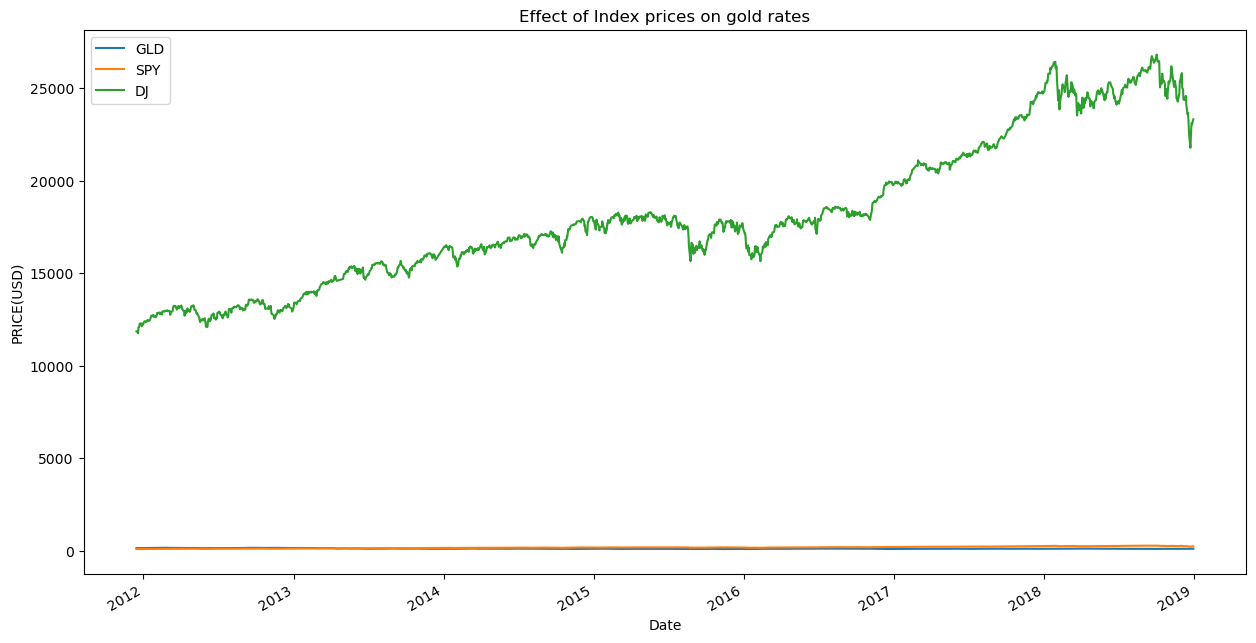

In [9]:
GLD_adj_close = gold['Adj Close']
SPY_adj_close = gold['SP_Ajclose']
DJ_adj_close  = gold['DJ_Ajclose']

g_p = pd.DataFrame({'GLD':GLD_adj_close, 'SPY':SPY_adj_close, 'DJ':DJ_adj_close})

g_ax = g_p.plot(title='Effect of Index prices on gold rates',figsize=(15,8))

g_ax.set_ylabel('PRICE(USD)')
g_ax.legend(loc='upper left')
plt.show()

In [10]:
def compute_daily_returns(g):
    """Compute and return the daily return values."""
    daily_return = (g / g.shift(1)) - 1
    daily_return[0] = 0
    return daily_return

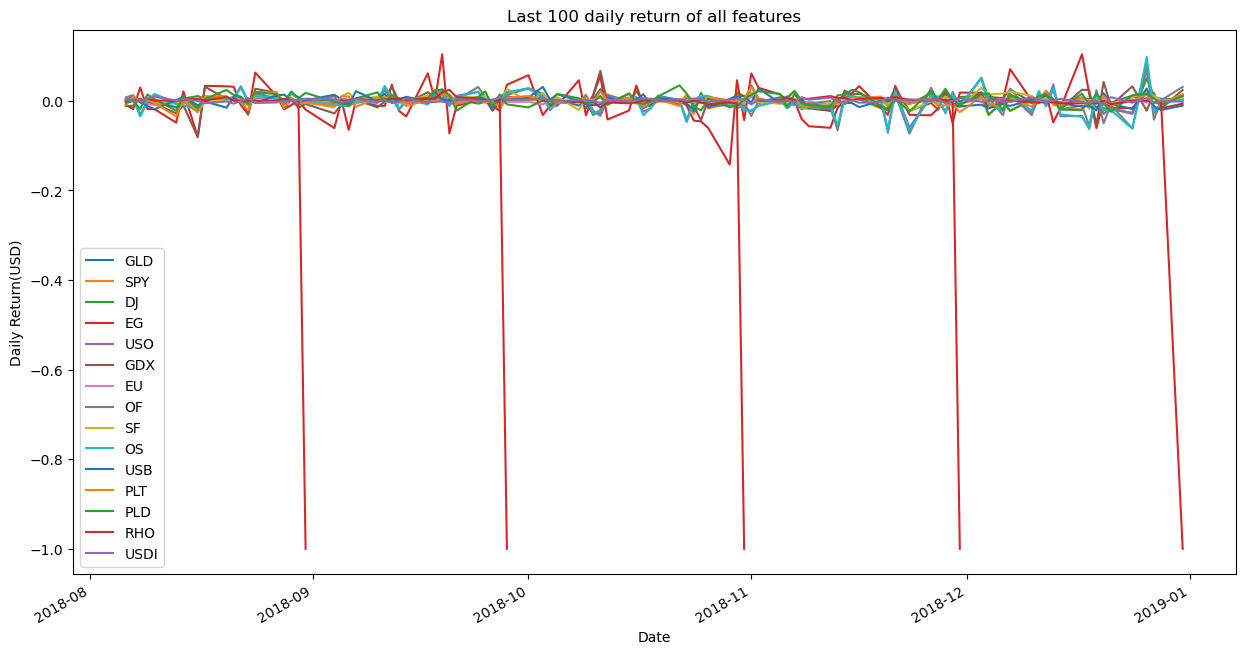

In [11]:
GLD_adj_close = gold['Adj Close']
SPY_adj_close = gold['SP_Ajclose']
DJ_adj_close  = gold['DJ_Ajclose']
EG_adj_close =  gold['EG_Ajclose']
USO_Adj_close = gold['USO_Adj Close']
GDX_Adj_close = gold['GDX_Adj Close']
EU_price      = gold['EU_Price']
OF_price      = gold['OF_Price']
OS_price      = gold['OS_Price']
SF_price      = gold['SF_Price']
USB_price      = gold['USB_Price']
PLT_price      = gold['PLT_Price']
PLD_price      = gold['PLD_Price']
rho_price      = gold['RHO_PRICE']
usdi_price      = gold['USDI_Price']



GLD_daily_return = compute_daily_returns(GLD_adj_close)
SPY_daily_return = compute_daily_returns(SPY_adj_close)
DJ_adj_return    = compute_daily_returns(DJ_adj_close)
EG_adj_return     = compute_daily_returns(EG_adj_close)
USO_Adj_return    = compute_daily_returns(USO_Adj_close)
GDX_Adj_return   =compute_daily_returns(GDX_Adj_close)
EU_return        = compute_daily_returns(EU_price)
OF_price         =compute_daily_returns(OF_price)
OS_price         =compute_daily_returns(OS_price)
SF_price         =compute_daily_returns(SF_price)
USB_price         =compute_daily_returns(USB_price)
PLT_price         =compute_daily_returns(PLT_price)
PLD_price         =compute_daily_returns(PLD_price)
rho_price         =compute_daily_returns(rho_price)
USDI_price         =compute_daily_returns(usdi_price)

diagram = pd.DataFrame({'GLD':GLD_daily_return, 'SPY':SPY_daily_return, 'DJ':DJ_adj_return, 'EG':EG_adj_return, 'USO':USO_Adj_return,
                  'GDX':GDX_Adj_return,'EU':EU_return, 'OF':OF_price,'SF':SF_price,'OS':OS_price, 'USB':USB_price, 'PLT':PLT_price, 'PLD':PLD_price,
                  'RHO':rho_price,'USDI':USDI_price})

daily_ax = diagram[-100:].plot(title='Last 100 daily return of all features',figsize=(15,8))

daily_ax.set_ylabel('Daily Return(USD)')
daily_ax.legend(loc='lower left')
plt.show()

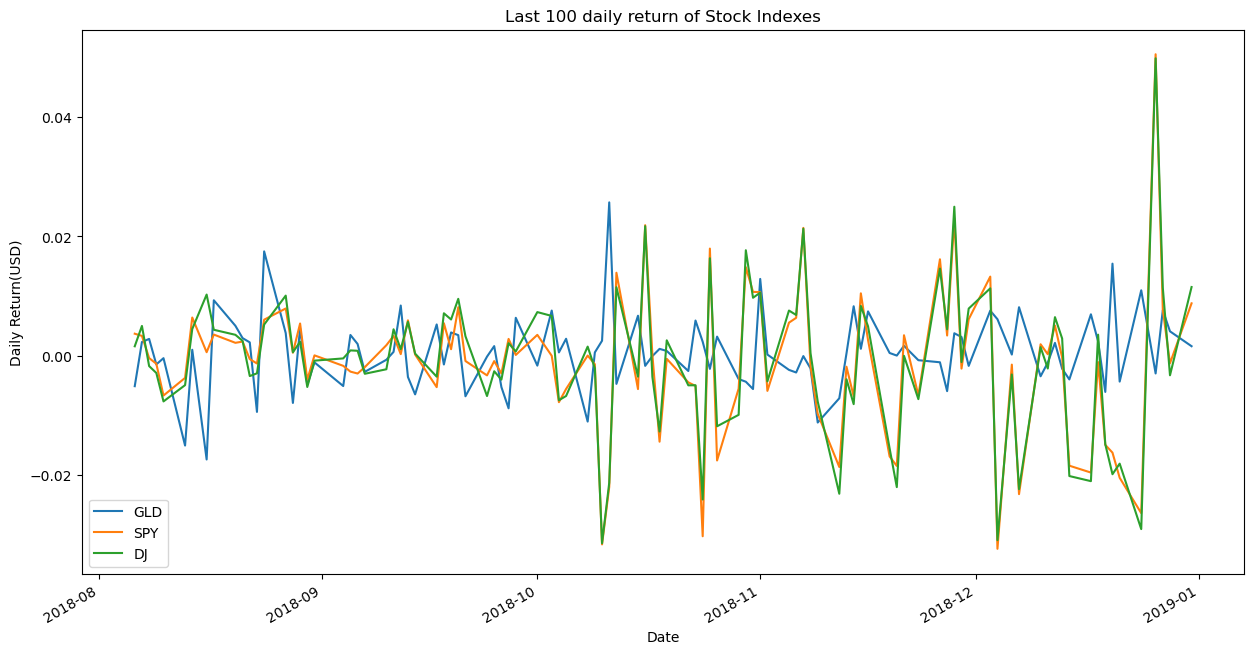

In [12]:
stock = pd.DataFrame({'GLD':GLD_daily_return, 'SPY':SPY_daily_return, 'DJ':DJ_adj_return})

daily_ax = stock[-100:].plot(title='Last 100 daily return of Stock Indexes',figsize=(15,8))

daily_ax.set_ylabel('Daily Return(USD)')
daily_ax.legend(loc='lower left')
plt.show()

<Axes: xlabel='SPY', ylabel='GLD'>

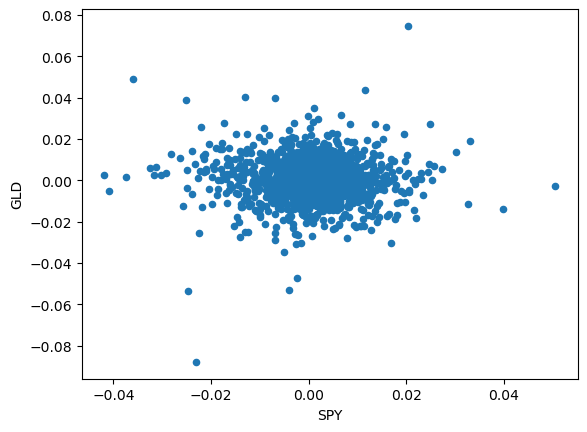

In [13]:
diagram.plot(kind='scatter', x='SPY', y='GLD')

<Axes: xlabel='DJ', ylabel='GLD'>

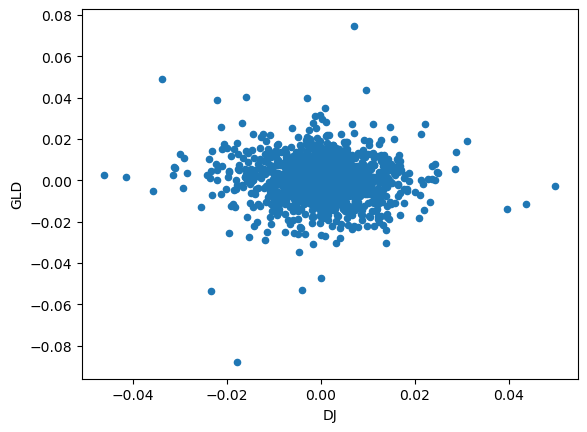

In [14]:
diagram.plot(kind='scatter', x='DJ', y='GLD')

<Axes: xlabel='EG', ylabel='GLD'>

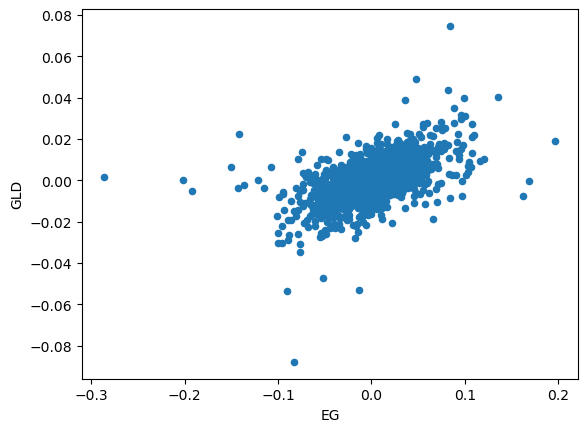

In [15]:
diagram.plot(kind='scatter', x='EG', y='GLD')

<Axes: xlabel='USO', ylabel='GLD'>

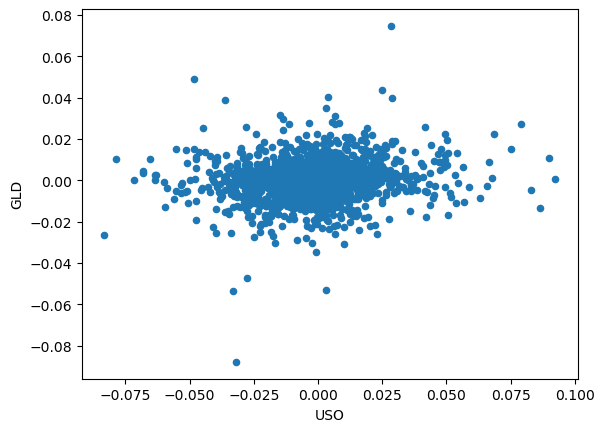

In [16]:
diagram.plot(kind='scatter', x='USO', y='GLD')

<Axes: xlabel='USB', ylabel='GLD'>

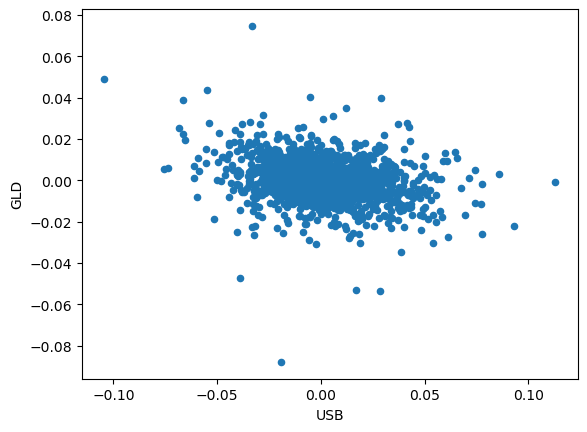

In [17]:
diagram.plot(kind='scatter', x='USB', y='GLD')

<Axes: xlabel='EU', ylabel='GLD'>

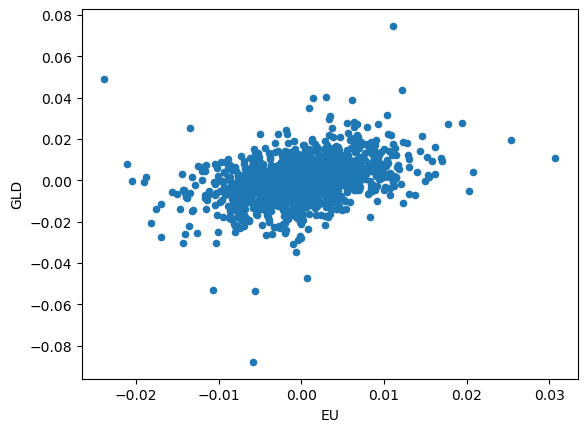

In [18]:
diagram.plot(kind='scatter', x='EU', y='GLD')

<Axes: xlabel='PLT', ylabel='GLD'>

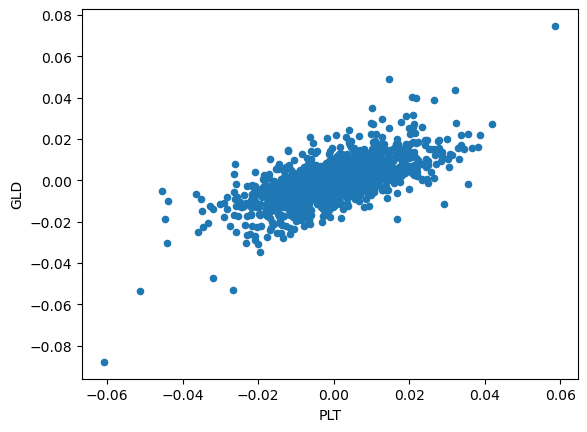

In [19]:
diagram.plot(kind='scatter', x='PLT', y='GLD')

<Axes: xlabel='PLD', ylabel='GLD'>

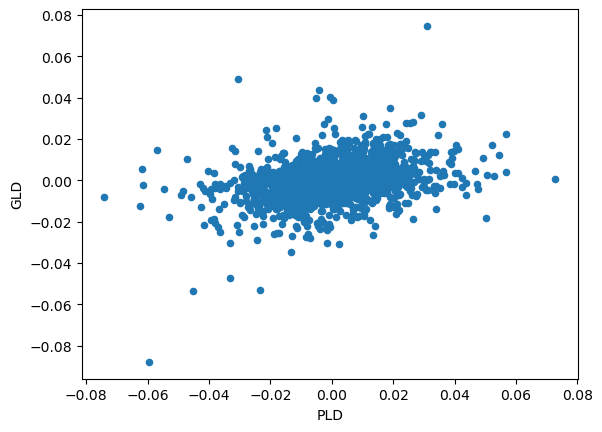

In [20]:
diagram.plot(kind='scatter', x='PLD', y='GLD')

Mean= -8.65698612128203e-05
Standard Deviation= 0.00961153616700639
Kurtosis= 8.606584924918355


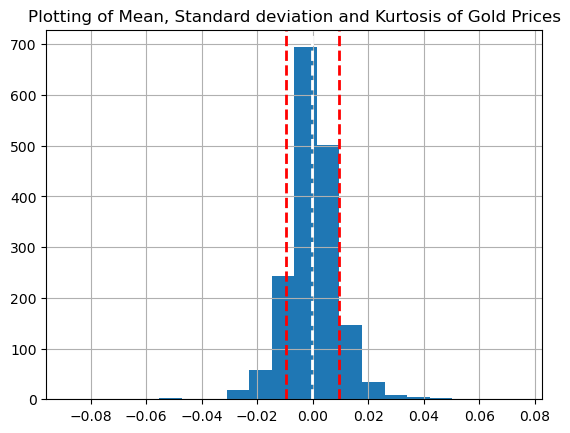

In [21]:
# computing mean,standard deviation and kurtosis of Gold ETF daily return

m=diagram['GLD'].mean()
# computing standard deviation of Gold stock
sd=diagram['GLD'].std()
kt=diagram['GLD'].kurtosis()
print('Mean=',m)
print('Standard Deviation=',sd)
print('Kurtosis=',kt)
#Plotting Histogram
diagram['GLD'].hist(bins=20)

plt.axvline(m, color='w',linestyle='dashed',linewidth=2)
plt.axvline(sd, color='r',linestyle='dashed',linewidth=2)
plt.axvline(-sd, color='r',linestyle='dashed',linewidth=2)
plt.title("Plotting of Mean, Standard deviation and Kurtosis of Gold Prices")
plt.show()

Mean= 0.0005366024364688835
Standard Deviation= 0.008262309911393526
Kurtosis= 3.4557859039745233


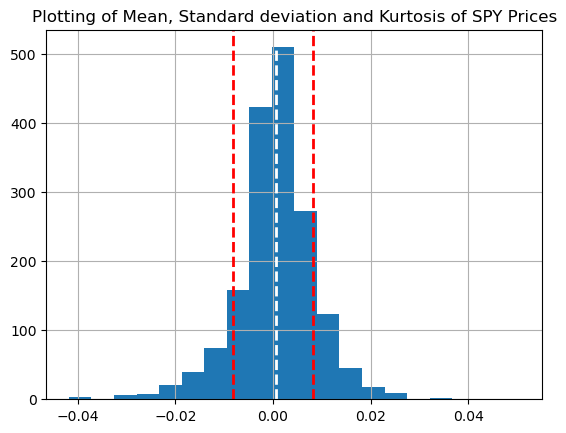

In [22]:
# computing mean,standard deviation and kurtosis of S&P 500 Index daily return

m=diagram['SPY'].mean()
# computing standard deviation of Gold stock
sd=diagram['SPY'].std()
kt=diagram['SPY'].kurtosis()
print('Mean=',m)
print('Standard Deviation=',sd)
print('Kurtosis=',kt)
#Plotting Histogram
diagram['SPY'].hist(bins=20)

plt.axvline(m, color='w',linestyle='dashed',linewidth=2)
plt.axvline(sd, color='r',linestyle='dashed',linewidth=2)
plt.axvline(-sd, color='r',linestyle='dashed',linewidth=2)
plt.title("Plotting of Mean, Standard deviation and Kurtosis of SPY Prices")
plt.show()

Mean= 0.0004266395218751805
Standard Deviation= 0.00815178011451231
Kurtosis= 3.832719336260695


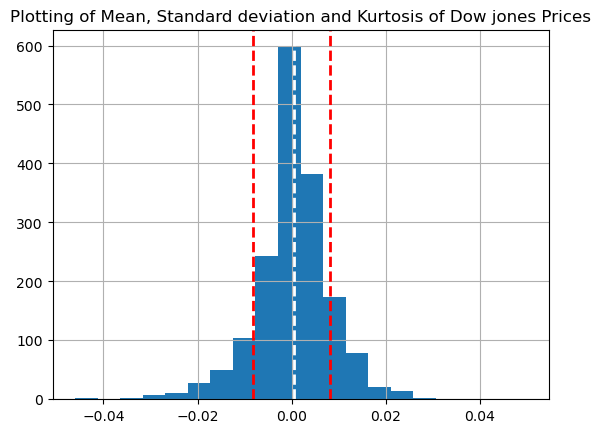

In [23]:
# computing mean,standard deviation and kurtosis of Dow Jones Index daily return
m=diagram['DJ'].mean()
# computing standard deviation of Gold stock
sd=diagram['DJ'].std()
kt=diagram['DJ'].kurtosis()
print('Mean=',m)
print('Standard Deviation=',sd)
print('Kurtosis=',kt)
#Plotting Histogram
diagram['DJ'].hist(bins=20)

plt.axvline(m, color='w',linestyle='dashed',linewidth=2)
plt.axvline(sd, color='r',linestyle='dashed',linewidth=2)
plt.axvline(-sd, color='r',linestyle='dashed',linewidth=2)
plt.title("Plotting of Mean, Standard deviation and Kurtosis of Dow jones Prices")
plt.show()

<Axes: >

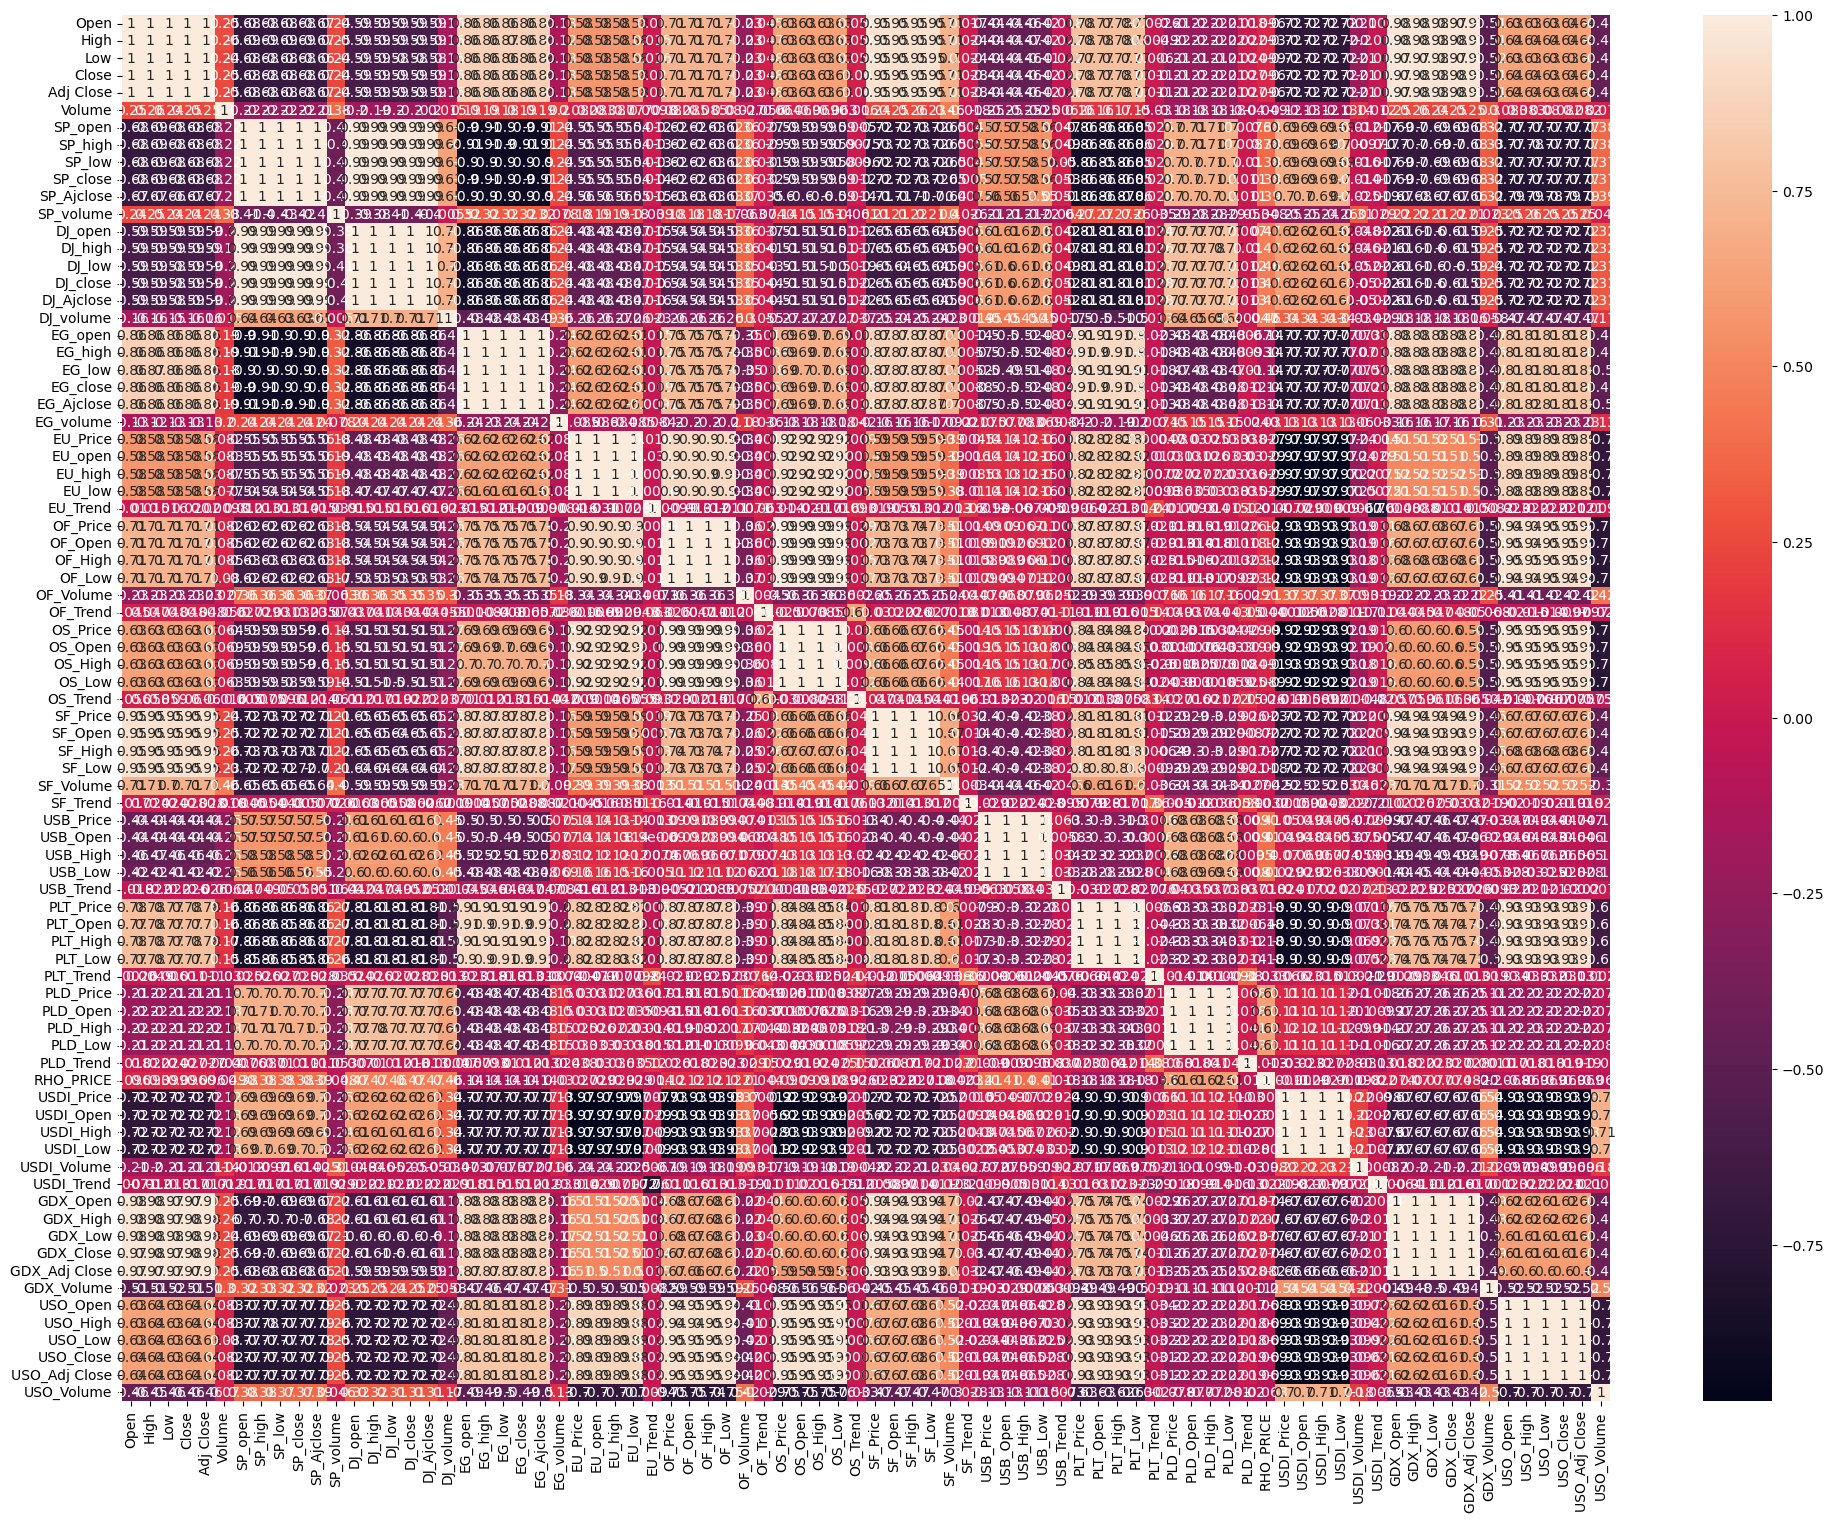

In [24]:
plt.figure(figsize=(24,18)) 
sns.heatmap(gold.corr(), annot=True) 

In [25]:
X=gold.drop(['Adj Close'],axis=1)
X=X.drop(['Close'],axis=1)

<Axes: title={'center': 'Correlation with Adj Close'}>

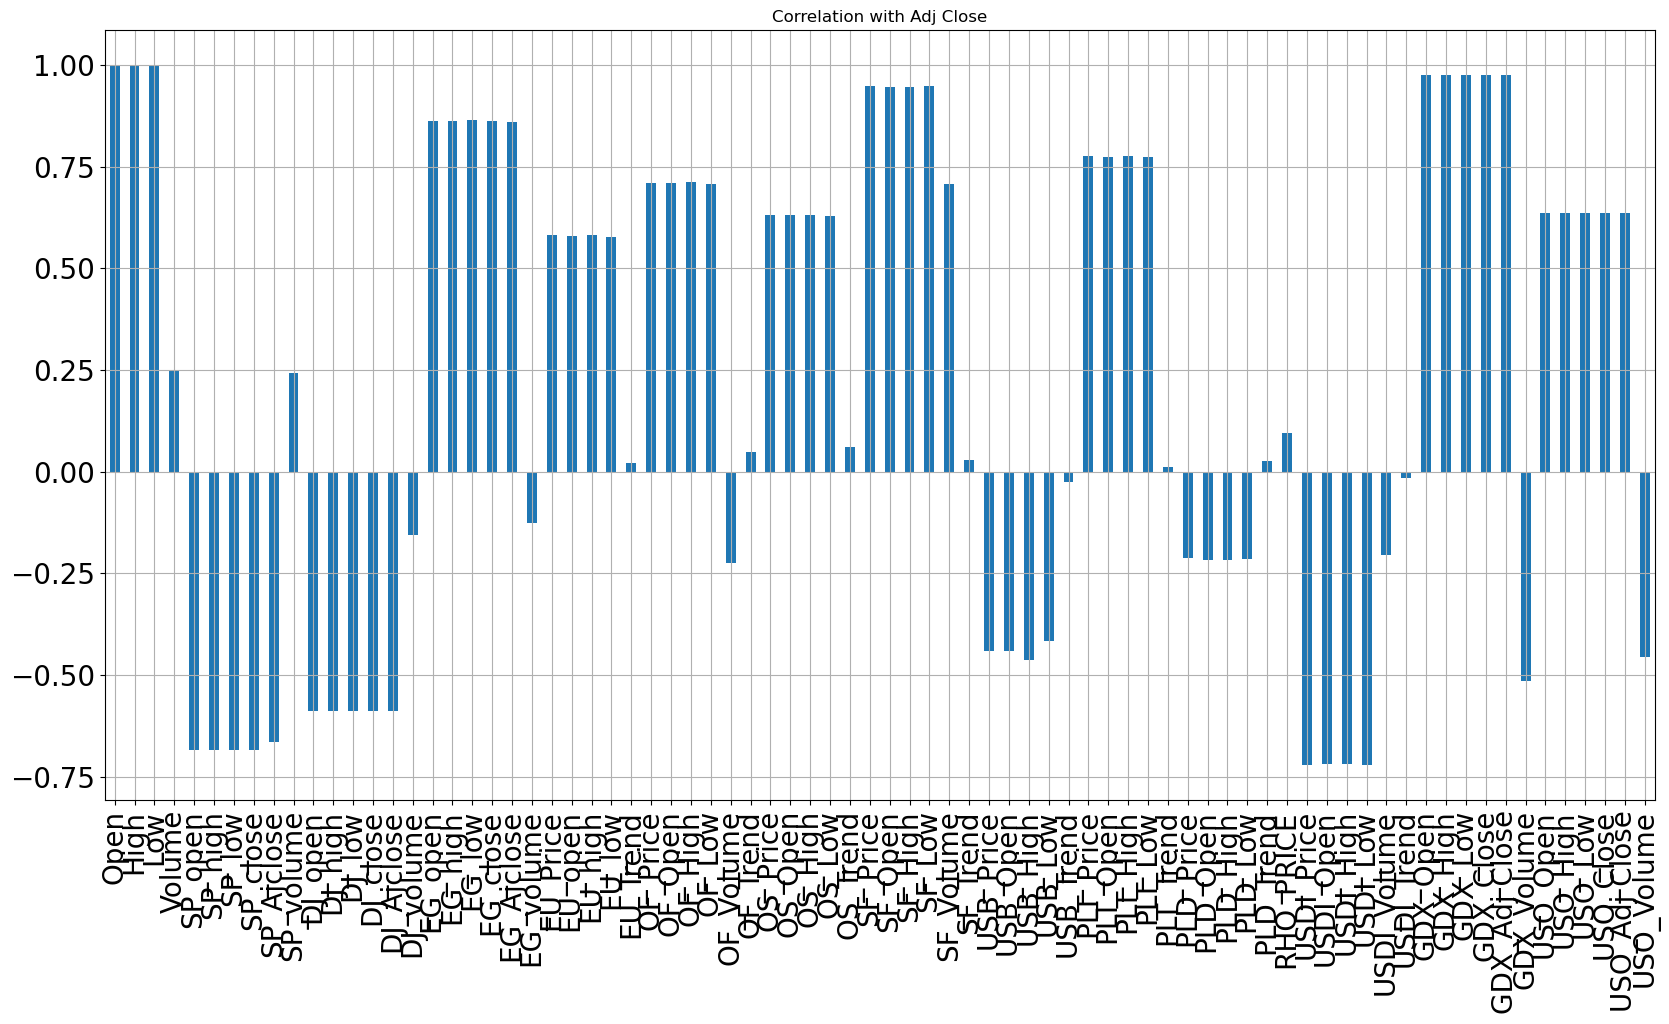

In [26]:
X.corrwith(gold['Adj Close']).plot.bar(
        figsize = (20, 10), title = "Correlation with Adj Close", fontsize = 20,
        rot = 90, grid = True)

In [27]:
corr_matrix=gold.corr()
coef=corr_matrix["Adj Close"].sort_values(ascending=False)

In [28]:
pos_corr=coef[coef>0]
pos_corr

Close            1.000000
Adj Close        1.000000
High             0.999535
Low              0.999532
Open             0.998976
GDX_Low          0.975561
GDX_Close        0.975459
GDX_High         0.975255
GDX_Adj Close    0.974980
GDX_Open         0.974824
SF_Low           0.947842
SF_Price         0.947420
SF_Open          0.945557
SF_High          0.945203
EG_low           0.863917
EG_open          0.862900
EG_close         0.862770
EG_high          0.861479
EG_Ajclose       0.859850
PLT_Price        0.775861
PLT_High         0.775481
PLT_Low          0.773993
PLT_Open         0.773760
OF_High          0.711334
OF_Price         0.710693
OF_Open          0.709096
OF_Low           0.708266
SF_Volume        0.706505
USO_Adj Close    0.635675
USO_Close        0.635675
USO_High         0.635311
USO_Open         0.635197
USO_Low          0.634732
OS_High          0.632001
OS_Price         0.630817
OS_Open          0.630046
OS_Low           0.629083
EU_high          0.582969
EU_Price    

In [29]:
neg_corr=coef[coef<0]
neg_corr

USDI_Trend    -0.016641
USB_Trend     -0.025933
EG_volume     -0.126586
DJ_volume     -0.155526
USDI_Volume   -0.205954
PLD_Price     -0.213179
PLD_Low       -0.214919
PLD_Open      -0.216426
PLD_High      -0.217490
OF_Volume     -0.225436
USB_Low       -0.417352
USB_Open      -0.440822
USB_Price     -0.441347
USO_Volume    -0.456193
USB_High      -0.464116
GDX_Volume    -0.514616
DJ_low        -0.588157
DJ_Ajclose    -0.588411
DJ_close      -0.588411
DJ_high       -0.588778
DJ_open       -0.588800
SP_Ajclose    -0.666071
SP_low        -0.683750
SP_close      -0.684284
SP_open       -0.684618
SP_high       -0.684904
USDI_High     -0.720023
USDI_Open     -0.720140
USDI_Price    -0.721569
USDI_Low      -0.722078
Name: Adj Close, dtype: float64

In [30]:
def calculate_MACD(g, nslow=26, nfast=12):
    emaslow = g.ewm(span=nslow, min_periods=nslow, adjust=True, ignore_na=False).mean()
    emafast = g.ewm(span=nfast, min_periods=nfast, adjust=True, ignore_na=False).mean()
    diff = emafast - emaslow
    MACD = diff.ewm(span=9, min_periods=9, adjust=True, ignore_na=False).mean()
    return diff, MACD

def calculate_RSI(g, periods=14):
    # wilder's RSI
    delta = g.diff()
    up, down = delta.copy(), delta.copy()

    up[up < 0] = 0
    down[down > 0] = 0

    rUp = up.ewm(com=periods,adjust=False).mean()
    rDown = down.ewm(com=periods, adjust=False).mean().abs()

    rsi = 100 - 100 / (1 + rUp / rDown)
    return rsi

def calculate_SMA(g, peroids=15):
    SMA = g.rolling(window=peroids, min_periods=peroids, center=False).mean()
    return SMA

def calculate_BB(g, peroids=15):
    SD = g.rolling(window=peroids,min_periods=peroids, center=False).std()
    SMA = calculate_SMA(g)
    upper_band = SMA + (2 * SD)
    lower_band = SMA - (2 * SD)
    return upper_band, lower_band

def calculate_stdev(g,periods=5):
    STDEV = g.rolling(periods).std()
    return STDEV

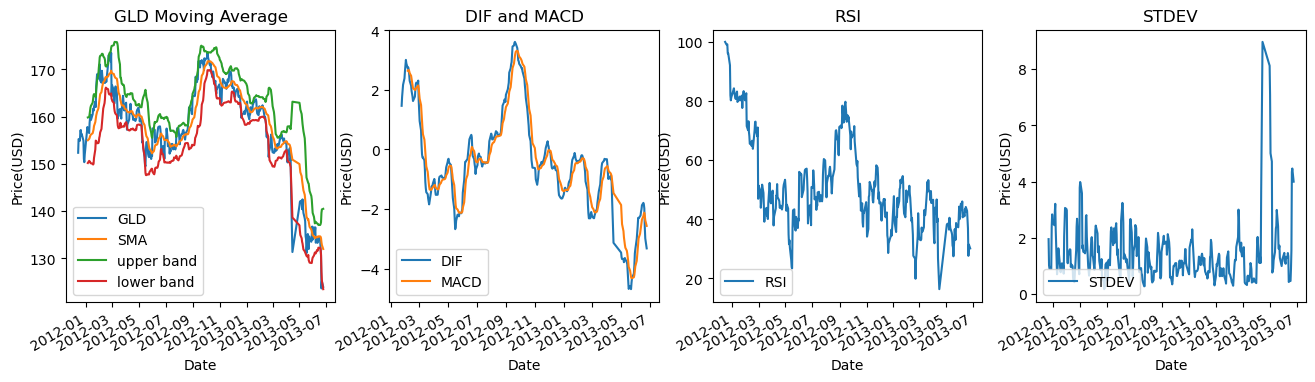

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Calculate Simple Moving Average for GLD
SMA_GLD = calculate_SMA(GLD_adj_close)

GLD_adj_close[:365].plot(title='GLD Moving Average',label='GLD', ax=axes[0])

SMA_GLD[:365].plot(label="SMA",ax=axes[0])


# Calculate Bollinger Bands for GLD
upper_band, lower_band = calculate_BB(GLD_adj_close)

upper_band[:365].plot(label='upper band', ax=axes[0])
lower_band[:365].plot(label='lower band', ax=axes[0])


# Calculate MACD for GLD
DIF, MACD = calculate_MACD(GLD_adj_close)

DIF[:365].plot(title='DIF and MACD',label='DIF', ax=axes[1])
MACD[:365].plot(label='MACD', ax=axes[1])

# Calculate RSI(Relative Strength Index) for GLD
RSI = calculate_RSI(GLD_adj_close)
RSI[:365].plot(title='RSI',label='RSI', ax=axes[2])

# Calculating Standard deviation for GLD
STDEV= calculate_stdev(GLD_adj_close)
STDEV[:365].plot(title='STDEV',label='STDEV', ax=axes[3])

Open_Close=gold.Open - gold.Close

High_Low=gold.High-gold.Low

axes[0].set_ylabel('Price(USD)')
axes[1].set_ylabel('Price(USD)')
axes[2].set_ylabel('Price(USD)')
axes[3].set_ylabel('Price(USD)')



axes[0].legend(loc='lower left')
axes[1].legend(loc='lower left')
axes[2].legend(loc='lower left')
axes[3].legend(loc='lower left')

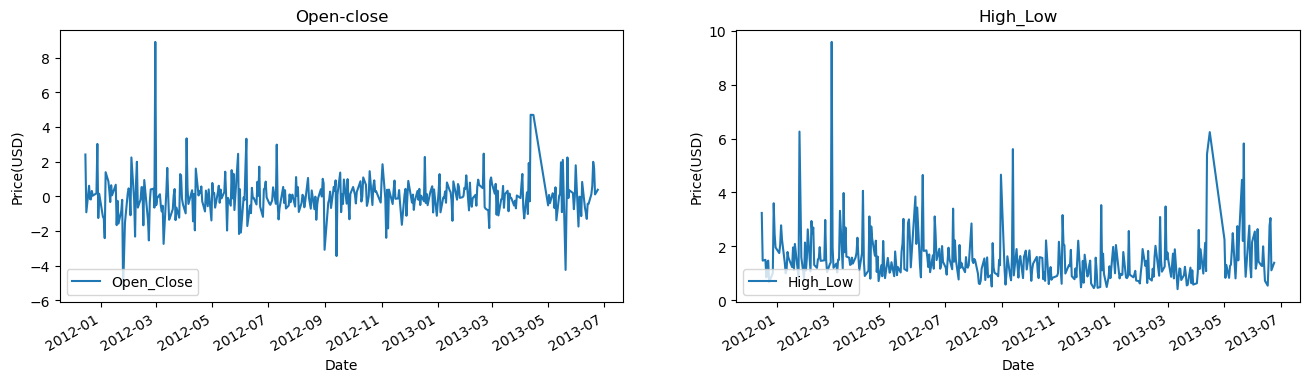

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
Open_Close=gold.Open - gold.Close
Open_Close[:365].plot(title='Open-close',label='Open_Close', ax=axes[0])

High_Low=gold.High-gold.Low
High_Low[:365].plot(title='High_Low',label='High_Low', ax=axes[1])
axes[0].set_ylabel('Price(USD)')
axes[1].set_ylabel('Price(USD)')


axes[0].legend(loc='lower left')
axes[1].legend(loc='lower left')


In [33]:
test = gold
test['SMA'] = SMA_GLD
test['Upper_band'] = upper_band
test['Lower_band'] = lower_band
test['DIF'] = DIF
test['MACD'] = MACD
test['RSI'] = RSI
test['STDEV'] = STDEV
test['Open_Close']=Open_Close
test['High_Low']=High_Low


# Dropping first 33 records from the data as it has null values because of introduction of technical indicators
test = test[33:]

# Target column
target_adj_close = pd.DataFrame(test['Adj Close'])


display(test.head())

Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-02-06  166.960007  167.679993  166.610001  167.179993  167.179993   
2012-02-07  167.380005  170.089996  167.149994  169.699997  169.699997   
2012-02-08  169.259995  169.960007  167.500000  168.500000  168.500000   
2012-02-09  170.009995  170.369995  167.669998  168.020004  168.020004   
2012-02-10  166.490005  167.639999  166.330002  167.139999  167.139999   

              Volume     SP_open     SP_high      SP_low    SP_close  ...  \
Date                                                                  ...   
2012-02-06   8807400  133.979996  134.509995  133.830002  134.449997  ...   
2012-02-07  11614300  134.169998  135.020004  133.639999  134.789993  ...   
2012-02-08  10655500  134.860001  135.220001  134.309998  135.190002  ...   
2012-02-09  16085200  135.410004  135.589996  134.559998  135.360001  ...   
2012-02-10  10326800  134.160004  134.470001  133.839996  134.360001  ...   

            USO_Volume         SMA  Upper_band  Lower_band       DIF  \
Date                                                                   
2012-02-06     6126100  165.198666  173.018365  157.378968  2.724443   
2012-02-07    10237000  165.894667  173.296304  158.493029  2.754381   
2012-02-08     9045800  166.428000  173.297467  159.558533  2.655845   
2012-02-09     4663500  166.856000  173.217507  160.494493  2.511947   
2012-02-10     6008600  167.250666  172.795817  161.705515  2.303734   

                MACD        RSI     STDEV  Open_Close  High_Low  
Date                                                             
2012-02-06  2.641891  70.144545  1.562107   -0.219986  1.069992  
2012-02-07  2.667095  73.152763  1.594111   -2.319992  2.940002  
2012-02-08  2.664634  69.576023  1.575718    0.759995  2.460007  
2012-02-09  2.631843  68.148015  0.965153    1.989991  2.699997  
2012-02-10  2.562404  65.507009  1.059963   -0.649994  1.309997  

[5 rows x 89 columns]

In [34]:
gold.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_open',
       'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open',
       'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open',
       'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price',
       'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open',
       'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open',
       'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
       'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High',
       'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
       'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO

In [35]:
# Calculate correlation coefficients between features and target
corr_matrix=gold.corr()
coef=corr_matrix["Adj Close"].sort_values(ascending=False)
kp_corr = coef[coef>0.95]  # Assuming 'adj close' is your target column

# Identify columns with correlation >= 0.70
high_corr_columns = pos_corr[pos_corr >= 0.95].index

# Select feature columns based on high correlation
keep_columns = [col for col in gold if col in high_corr_columns]

# Display the selected feature columns
print('The columns with correlation >= 0.95:')
print(keep_columns)

The columns with correlation >= 0.95:
['Open', 'High', 'Low', 'Close', 'Adj Close', 'GDX_Open', 'GDX_High', 'GDX_Low', 'GDX_Close', 'GDX_Adj Close']


In [36]:
# selecting Feature Columns
feature_columns = ['Open', 'High', 'Low', 'Volume','SP_open','SP_high','SP_low','SP_Ajclose','SP_volume','DJ_open','DJ_high', 'DJ_low',  'DJ_Ajclose', 'DJ_volume', 'EG_open','EG_high', 'EG_low',  
                   'EG_Ajclose', 'EG_volume', 'EU_Price','EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price','OF_Open','OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open','OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High',
                   'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High','USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low',
                    'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low','PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
                     'USDI_Low', 'USDI_Volume', 'USDI_Trend','GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_High', 'USO_Low', 'USO_Close', 'USO_Adj Close', 'USO_Volume','SMA', 'Upper_band', 'Lower_band', 'DIF', 'MACD','RSI','STDEV','Open_Close', 'High_Low']

# Data Normalization

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_minmax_transform_data = scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data, index=test.index)
feature_minmax_transform.head()

Open      High       Low    Volume   SP_open   SP_high  \
Date                                                                     
2012-02-06  0.913669  0.912561  0.913193  0.079151  0.037098  0.034927   
2012-02-07  0.919480  0.945539  0.920622  0.109560  0.038247  0.038015   
2012-02-08  0.945490  0.943760  0.925437  0.099173  0.042423  0.039225   
2012-02-09  0.955866  0.949370  0.927775  0.157998  0.045752  0.041465   
2012-02-10  0.907167  0.912014  0.909341  0.095612  0.038187  0.034685   

              SP_low  SP_Ajclose  SP_volume   DJ_open  ...  USO_Volume  \
Date                                                   ...               
2012-02-06  0.040627    0.028113   0.166542  0.051563  ...    0.046608   
2012-02-07  0.039473    0.029765   0.224602  0.050453  ...    0.084243   
2012-02-08  0.043542    0.031707   0.232599  0.051907  ...    0.073338   
2012-02-09  0.045060    0.032533   0.251876  0.053171  ...    0.033218   
2012-02-10  0.040687    0.027676   0.292146  0.053519  ...    0.045532   

                 SMA  Upper_band  Lower_band       DIF      MACD       RSI  \
Date                                                                         
2012-02-06  0.906189    0.961240    0.821988  0.893394  0.911893  0.807275   
2012-02-07  0.916193    0.965092    0.837893  0.896986  0.915193  0.852413   
2012-02-08  0.923859    0.965108    0.853105  0.885164  0.914871  0.798744   
2012-02-09  0.930011    0.964000    0.866467  0.867900  0.910578  0.777317   
2012-02-10  0.935684    0.958155    0.883757  0.842920  0.901486  0.737688   

               STDEV  Open_Close  High_Low  
Date                                        
2012-02-06  0.167603    0.415010  0.091684  
2012-02-07  0.171198    0.280308  0.291045  
2012-02-08  0.169132    0.477870  0.239873  
2012-02-09  0.100533    0.556766  0.265458  
2012-02-10  0.111185    0.387428  0.117271  

[5 rows x 84 columns]

In [38]:
display(feature_minmax_transform.head())
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)

# Shift target array because we want to predict the n + 1 day value


target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1]
target_adj_close = target_adj_close[:-90]

# Taking last 90 rows of data to be validation set
validation_X = feature_minmax_transform[-90:-1]
feature_minmax_transform = feature_minmax_transform[:-90]
display(validation_X.tail())
display(validation_y.tail())

print("\n -----After process------ \n")
print('Shape of features : ', feature_minmax_transform.shape)
print('Shape of target : ', target_adj_close.shape)
display(target_adj_close.tail())

Open      High       Low    Volume   SP_open   SP_high  \
Date                                                                     
2012-02-06  0.913669  0.912561  0.913193  0.079151  0.037098  0.034927   
2012-02-07  0.919480  0.945539  0.920622  0.109560  0.038247  0.038015   
2012-02-08  0.945490  0.943760  0.925437  0.099173  0.042423  0.039225   
2012-02-09  0.955866  0.949370  0.927775  0.157998  0.045752  0.041465   
2012-02-10  0.907167  0.912014  0.909341  0.095612  0.038187  0.034685   

              SP_low  SP_Ajclose  SP_volume   DJ_open  ...  USO_Volume  \
Date                                                   ...               
2012-02-06  0.040627    0.028113   0.166542  0.051563  ...    0.046608   
2012-02-07  0.039473    0.029765   0.224602  0.050453  ...    0.084243   
2012-02-08  0.043542    0.031707   0.232599  0.051907  ...    0.073338   
2012-02-09  0.045060    0.032533   0.251876  0.053171  ...    0.033218   
2012-02-10  0.040687    0.027676   0.292146  0.053519  ...    0.045532   

                 SMA  Upper_band  Lower_band       DIF      MACD       RSI  \
Date                                                                         
2012-02-06  0.906189    0.961240    0.821988  0.893394  0.911893  0.807275   
2012-02-07  0.916193    0.965092    0.837893  0.896986  0.915193  0.852413   
2012-02-08  0.923859    0.965108    0.853105  0.885164  0.914871  0.798744   
2012-02-09  0.930011    0.964000    0.866467  0.867900  0.910578  0.777317   
2012-02-10  0.935684    0.958155    0.883757  0.842920  0.901486  0.737688   

               STDEV  Open_Close  High_Low  
Date                                        
2012-02-06  0.167603    0.415010  0.091684  
2012-02-07  0.171198    0.280308  0.291045  
2012-02-08  0.169132    0.477870  0.239873  
2012-02-09  0.100533    0.556766  0.265458  
2012-02-10  0.111185    0.387428  0.117271  

[5 rows x 84 columns]

Shape of features :  (1685, 84)
Shape of target :  (1685, 1)


Open      High       Low    Volume   SP_open   SP_high  \
Date                                                                     
2018-12-21  0.252767  0.249863  0.252304  0.131396  0.719499  0.732264   
2018-12-24  0.258024  0.262042  0.266061  0.089215  0.672900  0.678571   
2018-12-26  0.272551  0.273810  0.266061  0.138587  0.654321  0.710896   
2018-12-27  0.271859  0.272441  0.273903  0.112378  0.694263  0.723668   
2018-12-28  0.275042  0.274904  0.281882  0.058103  0.736686  0.742494   

              SP_low  SP_Ajclose  SP_volume   DJ_open  ...  USO_Volume  \
Date                                                   ...               
2018-12-21  0.685249    0.721173   0.474541  0.731087  ...    0.346662   
2018-12-24  0.650574    0.685607   0.249183  0.693452  ...    0.188254   
2018-12-26  0.647477    0.751818   0.397651  0.662258  ...    0.365682   
2018-12-27  0.679055    0.762387   0.330444  0.714615  ...    0.325400   
2018-12-28  0.724540    0.760598   0.261258  0.754292  ...    0.199288   

                 SMA  Upper_band  Lower_band       DIF      MACD       RSI  \
Date                                                                         
2018-12-21  0.221370    0.217009    0.228105  0.658641  0.648503  0.687759   
2018-12-24  0.225663    0.221905    0.231591  0.673309  0.655308  0.771343   
2018-12-26  0.228778    0.225424    0.234153  0.680140  0.662243  0.728779   
2018-12-27  0.232083    0.233069    0.232846  0.692906  0.670576  0.782400   
2018-12-28  0.235840    0.241125    0.232010  0.706157  0.680136  0.808642   

               STDEV  Open_Close  High_Low  
Date                                        
2018-12-21  0.071990    0.459268  0.050107  
2018-12-24  0.103731    0.400256  0.038380  
2018-12-26  0.105509    0.490699  0.130064  
2018-12-27  0.071859    0.429121  0.058636  
2018-12-28  0.092629    0.412444  0.015992  

[5 rows x 84 columns]

Adj Close
Date                  
2018-12-21  120.019997
2018-12-24  119.660004
2018-12-26  120.570000
2018-12-27  121.059998
2018-12-28  121.250000


 -----After process------ 

Shape of features :  (1595, 84)
Shape of target :  (1595, 1)


Adj Close
Date                  
2018-08-13  113.070000
2018-08-14  111.099998
2018-08-16  112.129997
2018-08-17  112.690002
2018-08-20  113.019997

In [39]:
ts_split= TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
        X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()
       

In [40]:
X_train.shape

(1450, 84)

In [41]:
X_test.shape

(145, 84)

In [42]:
y_train.shape

(1450,)

In [43]:
y_test.shape

(145,)

In [44]:
def validate_result(model, model_name):
    predicted = model.predict(validation_X)

    plt.plot(validation_y.index, predicted,'r', label='Predict')
    plt.plot(validation_y.index, validation_y,'b', label='Actual')
    plt.ylabel('Price(USD)')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

# Decision Tree

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Best Hyperparameters for Decision Tree Regressor (GridSearchCV):
{'max_depth': 5, 'min_impurity_decrease': 0.03, 'min_samples_leaf': 7, 'min_samples_split': 17}


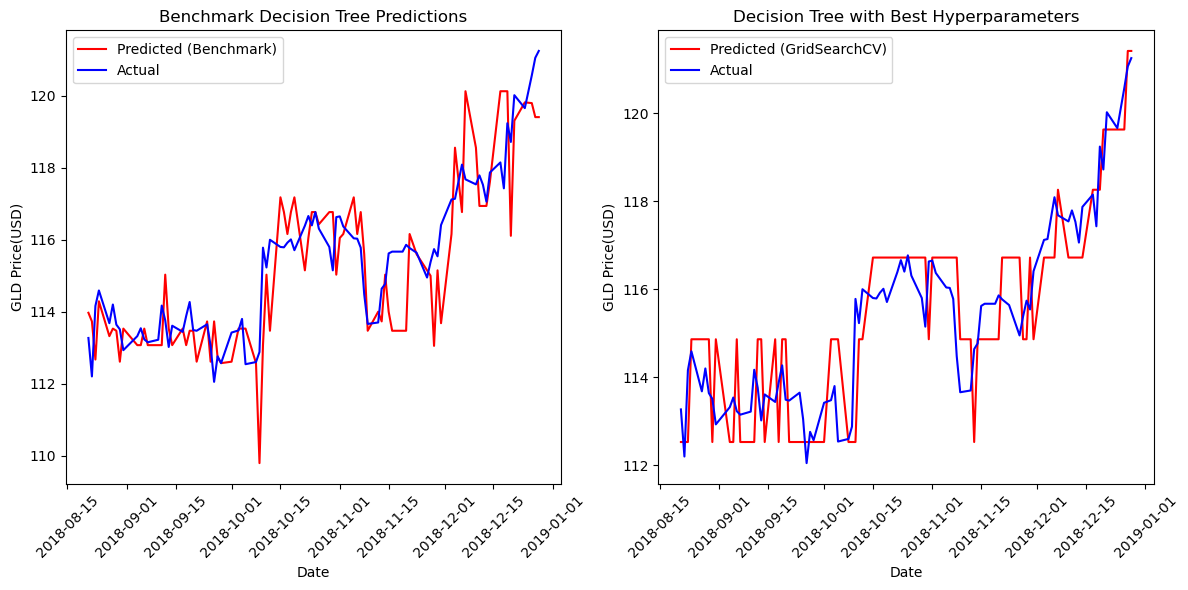

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

solution_models = {}
# Create a Decision Tree Regressor for the benchmark
dtree = DecisionTreeRegressor(random_state=0)
benchmark_dtree = dtree.fit(X_train, y_train)

# Define a grid of hyperparameters to search over
dtree_parameters = {
    'max_depth': [5, 6, 7, 8],  # Customize as needed
    'min_samples_split': [15, 16, 17],
    'min_samples_leaf': [6, 7, 8],
    'min_impurity_decrease': [0.03, 0.06, 0.09]  # Control regularization with min_impurity_decrease
}

# Perform grid search with cross-validation for GridSearchCV
dtree_grid_search = GridSearchCV(estimator=dtree,
                                  param_grid=dtree_parameters,
                                  cv=ts_split,
                                  verbose=1,
                                  n_jobs=-1)

# Fit the grid search to your training data for GridSearchCV
dtree_GS = dtree_grid_search.fit(X_train, y_train)

# Print the best hyperparameters found for Decision Tree
print("Best Hyperparameters for Decision Tree Regressor (GridSearchCV):")
print(dtree_GS.best_params_)

# Make predictions using the model with the best hyperparameters for Decision Tree
best_dtree = dtree_GS.best_estimator_
validation_predictions_dtree = best_dtree.predict(validation_X)

rmse_dtree = np.sqrt(mean_squared_error(validation_y, validation_predictions_dtree))

# Create two subplots
plt.figure(figsize=(12, 6))

# Benchmark Decision Tree
plt.subplot(1, 2, 1)
benchmark_predictions = benchmark_dtree.predict(validation_X)
plt.plot(validation_y.index, benchmark_predictions, 'r', label='Predicted (Benchmark)')
plt.plot(validation_y.index, validation_y, 'b', label='Actual')
plt.xlabel('Date')
plt.ylabel('GLD Price(USD)')
plt.title('Benchmark Decision Tree Predictions')
plt.xticks(rotation=45)
plt.legend()

# GridSearchCV Decision Tree
plt.subplot(1, 2, 2)
dtree_GS_predictions = dtree_GS.best_estimator_.predict(validation_X)
plt.plot(validation_y.index, dtree_GS_predictions, 'r', label='Predicted (GridSearchCV)')
plt.plot(validation_y.index, validation_y, 'b', label='Actual')
plt.xlabel('Date')
plt.ylabel('GLD Price(USD)')
plt.title('Decision Tree with Best Hyperparameters')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

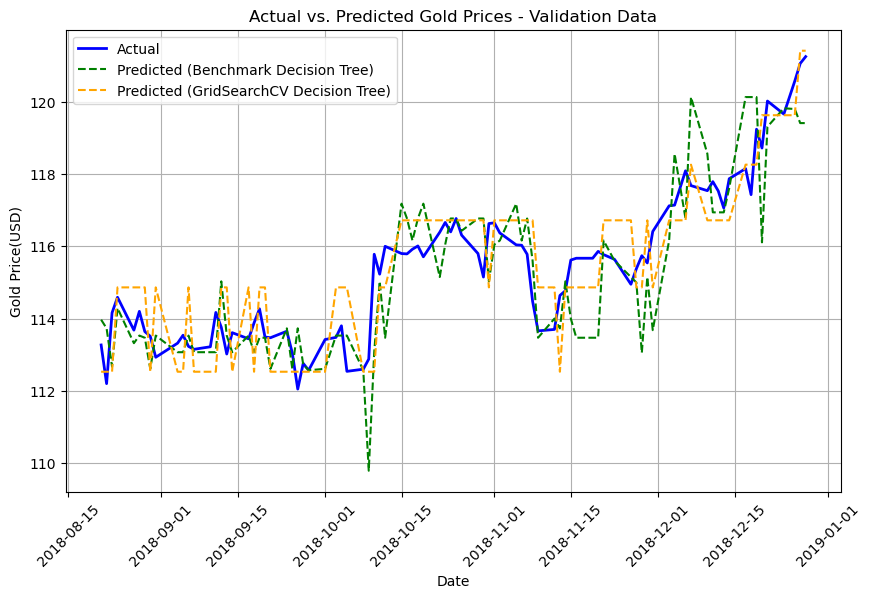

In [46]:
# Make predictions on the validation data for both models
benchmark_predictions = benchmark_dtree.predict(validation_X)
grid_search_predictions = dtree_GS.best_estimator_.predict(validation_X)

# Create line plots for the actual vs. predicted values on validation data for both models
plt.figure(figsize=(10, 6))
plt.plot(validation_y.index, validation_y, color='blue', label='Actual', linewidth=2)
plt.plot(validation_y.index, benchmark_predictions, color='green', label='Predicted (Benchmark Decision Tree)', linestyle='--')
plt.plot(validation_y.index, grid_search_predictions, color='orange', label='Predicted (GridSearchCV Decision Tree)', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Gold Price(USD)')
plt.title('Actual vs. Predicted Gold Prices - Validation Data')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.show()


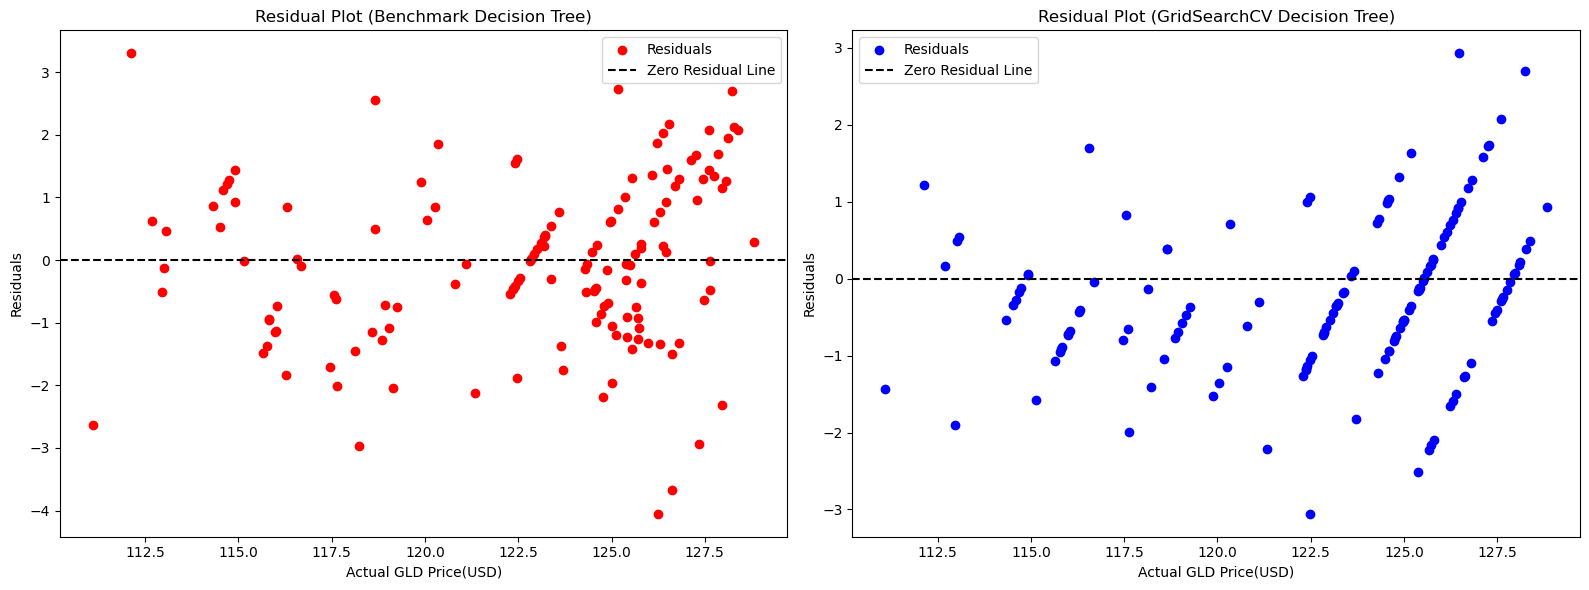

In [47]:
# Make predictions on the test data for both models
benchmark_test_predictions_dt = benchmark_dtree.predict(X_test)
grid_search_test_predictions_dt = dtree_GS.predict(X_test)

# Calculate residuals for both models
benchmark_residuals_dt = y_test - benchmark_test_predictions_dt
grid_search_residuals_dt = y_test - grid_search_test_predictions_dt

# Create two residual plots side by side
plt.figure(figsize=(16, 6))

# Residual plot for Benchmark Decision Tree
plt.subplot(1, 2, 1)
plt.scatter(y_test, benchmark_residuals_dt, color='red', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--', label='Zero Residual Line')
plt.xlabel('Actual GLD Price(USD)')
plt.ylabel('Residuals')
plt.title('Residual Plot (Benchmark Decision Tree)')
plt.legend()

# Residual plot for GridSearchCV Decision Tree
plt.subplot(1, 2, 2)
plt.scatter(y_test, grid_search_residuals_dt, color='blue', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--', label='Zero Residual Line')
plt.xlabel('Actual GLD Price(USD)')
plt.ylabel('Residuals')
plt.title('Residual Plot (GridSearchCV Decision Tree)')
plt.legend()

plt.tight_layout()
plt.show()


In [48]:
from sklearn import metrics

# Create a list of models to evaluate
models = [benchmark_dtree, dtree_GS]
model_names = ["Benchmark Decision Tree", "GridSearchCV Decision Tree"]

# Initialize lists to store metrics for each model
rmse_scores = []
r2_scores = []
mae_scores = []
mse_scores = []

for model, model_name in zip(models, model_names):
    # Make predictions
    predictions = model.predict(validation_X)
    
    # Calculate evaluation metrics
    r2 = r2_score(validation_y, predictions)
    mae = metrics.mean_absolute_error(validation_y, predictions)
    mse = metrics.mean_squared_error(validation_y, predictions)
    
    # Append the metrics to their respective lists
    rmse_scores.append(rmse_dtree)
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    
    # Print metrics for the current model
    print(f'Model: {model_name}')
    print('Root Mean Squared Error:', rmse_dtree)
    print('R-squared:', r2)
    print('Mean Absolute Error:', mae)
    print('Mean Squared Error:', mse)
    print('\n')

Model: Benchmark Decision Tree
Root Mean Squared Error: 1.0766411429475449
R-squared: 0.6590361406118342
Mean Absolute Error: 0.91707779775281
Mean Squared Error: 1.480327669673012


Model: GridSearchCV Decision Tree
Root Mean Squared Error: 1.0766411429475449
R-squared: 0.7330115738097318
Mean Absolute Error: 0.9052725302070803
Mean Squared Error: 1.1591561506873957




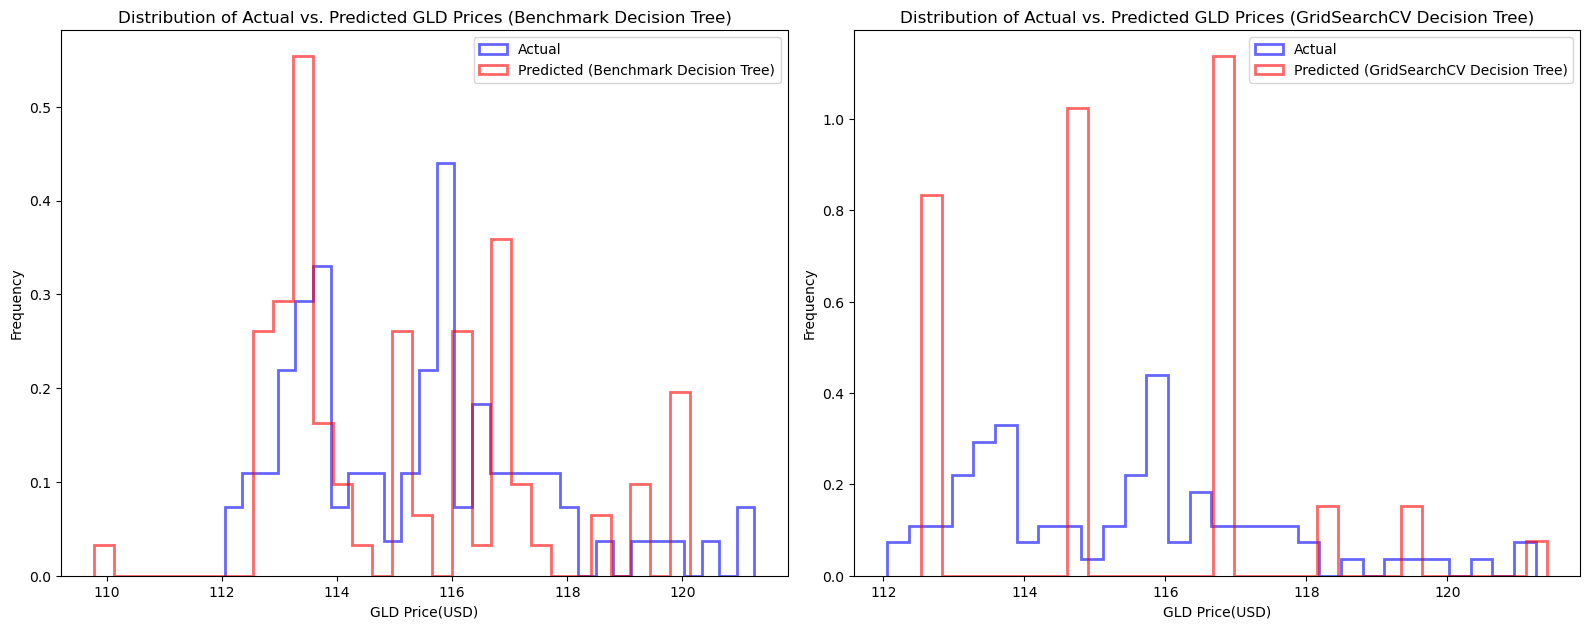

In [49]:
models = [benchmark_dtree, dtree_GS]
model_names = ["Benchmark Decision Tree", "GridSearchCV Decision Tree"]

# Create Distribution Plots for actual vs. predicted values
plt.figure(figsize=(16, 12))

for i, (model, model_name) in enumerate(zip(models, model_names), 1):
    # Make predictions for the current model
    validation_predictions = model.predict(validation_X)
    
    # Create subplots
    plt.subplot(2, 2, i)
    
    # Actual vs. Predicted values distribution
    plt.hist(validation_y, bins=30, color='blue', alpha=0.6, label='Actual', density=True, histtype='step', lw=2)
    plt.hist(validation_predictions, bins=30, color='red', alpha=0.6, label=f'Predicted ({model_name})', density=True, histtype='step', lw=2)

    plt.xlabel('GLD Price(USD)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Actual vs. Predicted GLD Prices ({model_name})')
    plt.legend()

plt.tight_layout()
plt.show()

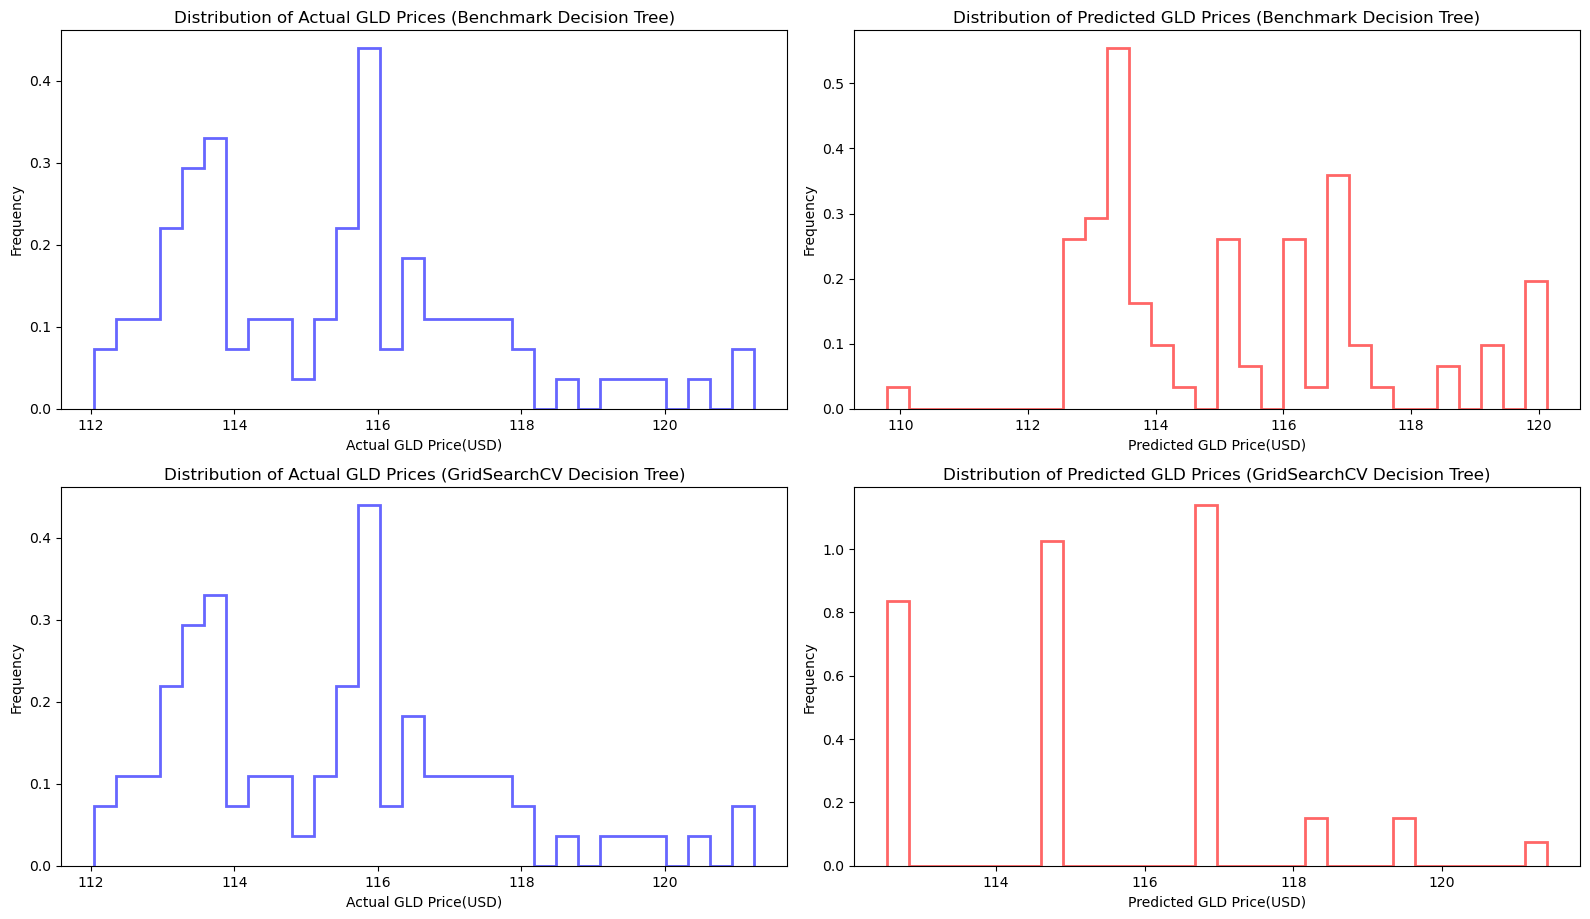

In [50]:
models = [benchmark_dtree, dtree_GS]
model_names = ["Benchmark Decision Tree", "GridSearchCV Decision Tree"]

# Create Distribution Plots for actual and predicted values
plt.figure(figsize=(16, 18))

for i, (model, model_name) in enumerate(zip(models, model_names), 1):
    # Make predictions for the current model
    validation_predictions = model.predict(validation_X)
    
    # Create subplots for actual vs. predicted values
    plt.subplot(4, 2, i * 2 - 1)
    
    # Actual values distribution
    plt.hist(validation_y, bins=30, color='blue', alpha=0.6, label='Actual', density=True, histtype='step', lw=2)
    plt.xlabel('Actual GLD Price(USD)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Actual GLD Prices ({model_name})')
    
    # Create subplots for actual vs. predicted values
    plt.subplot(4, 2, i * 2)
    
    # Predicted values distribution
    plt.hist(validation_predictions, bins=30, color='red', alpha=0.6, label=f'Predicted ({model_name})', density=True, histtype='step', lw=2)
    plt.xlabel('Predicted GLD Price(USD)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Predicted GLD Prices ({model_name})')

plt.tight_layout()
plt.show()

In [51]:
solution_models['Decision Tree'] = dtree_GS

# Ridge Regression

Best Hyperparameters for Ridge Regression:
{'alpha': 0.1}


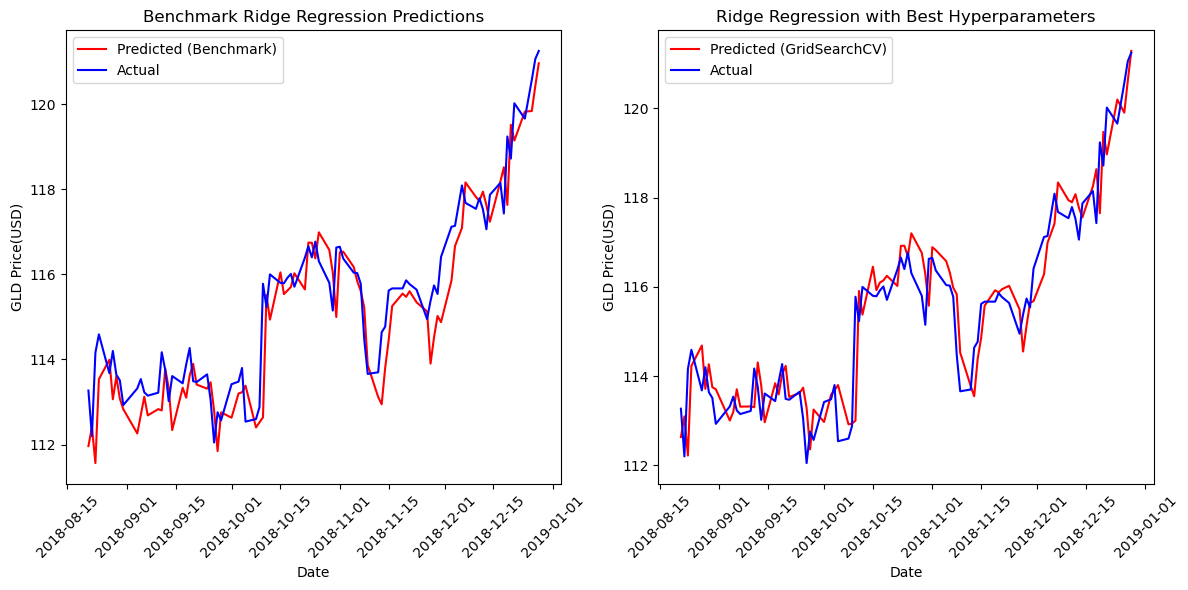

In [52]:
solution_models = {}

# Create a Ridge Regression model
ridge_reg = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength) as needed

# Fit the benchmark Ridge Regression model
benchmark_rdReg = ridge_reg.fit(X_train, y_train)

# Define hyperparameters for grid search
ridge_parameters = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # You can adjust the alpha values for grid search
}

# Perform GridSearchCV for Ridge Regression
ridge_grid_search = GridSearchCV(estimator=ridge_reg, param_grid=ridge_parameters, cv=ts_split)
ridge_GS = ridge_grid_search.fit(X_train, y_train)

print("Best Hyperparameters for Ridge Regression:")
print(ridge_GS.best_params_)

# Make predictions on the validation data for both models
benchmark_rdReg_predictions = benchmark_rdReg.predict(validation_X)
ridge_GS_predictions = ridge_GS.best_estimator_.predict(validation_X)

# Create two subplots
plt.figure(figsize=(12, 6))

# Benchmark Ridge Regression
plt.subplot(1, 2, 1)
plt.plot(validation_y.index, benchmark_rdReg_predictions, 'r', label='Predicted (Benchmark)')
plt.plot(validation_y.index, validation_y, 'b', label='Actual')
plt.xlabel('Date')
plt.ylabel('GLD Price(USD)')
plt.title('Benchmark Ridge Regression Predictions')
plt.xticks(rotation=45)
plt.legend()

# GridSearchCV Ridge Regression
plt.subplot(1, 2, 2)
plt.plot(validation_y.index, ridge_GS_predictions, 'r', label='Predicted (GridSearchCV)')
plt.plot(validation_y.index, validation_y, 'b', label='Actual')
plt.xlabel('Date')
plt.ylabel('GLD Price(USD)')
plt.title('Ridge Regression with Best Hyperparameters')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# Add the Ridge Regression model to the solution_models dictionary
solution_models['Ridge_Regression'] = ridge_GS.best_estimator_


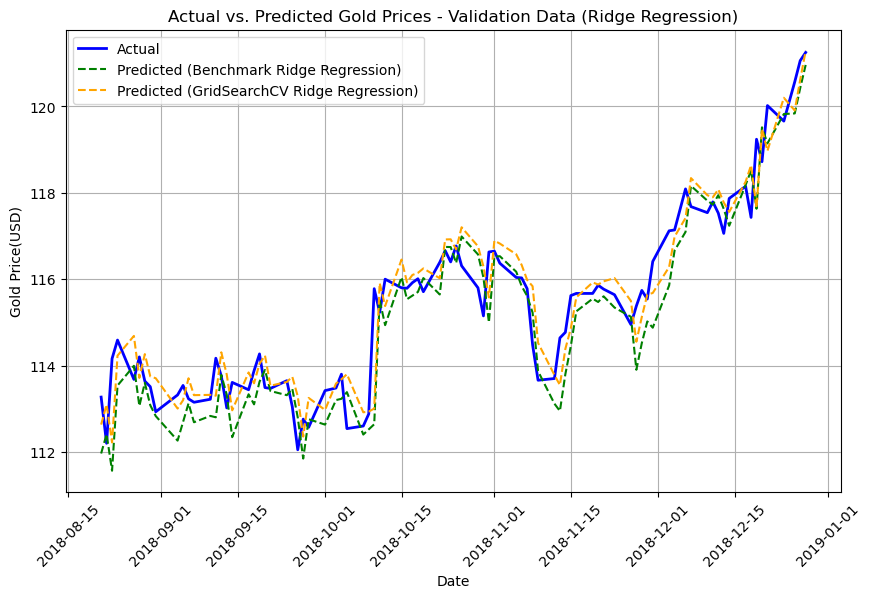

In [53]:
# Make predictions on the validation data for both models
benchmark_rdReg_predictions = benchmark_rdReg.predict(validation_X)
ridge_GS_predictions = ridge_GS.best_estimator_.predict(validation_X)

# Create line plots for the actual vs. predicted values on validation data for both models
plt.figure(figsize=(10, 6))
plt.plot(validation_y.index, validation_y, color='blue', label='Actual', linewidth=2)
plt.plot(validation_y.index, benchmark_rdReg_predictions, color='green', label='Predicted (Benchmark Ridge Regression)', linestyle='--')
plt.plot(validation_y.index, ridge_GS_predictions, color='orange', label='Predicted (GridSearchCV Ridge Regression)', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Gold Price(USD)')
plt.title('Actual vs. Predicted Gold Prices - Validation Data (Ridge Regression)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.show()


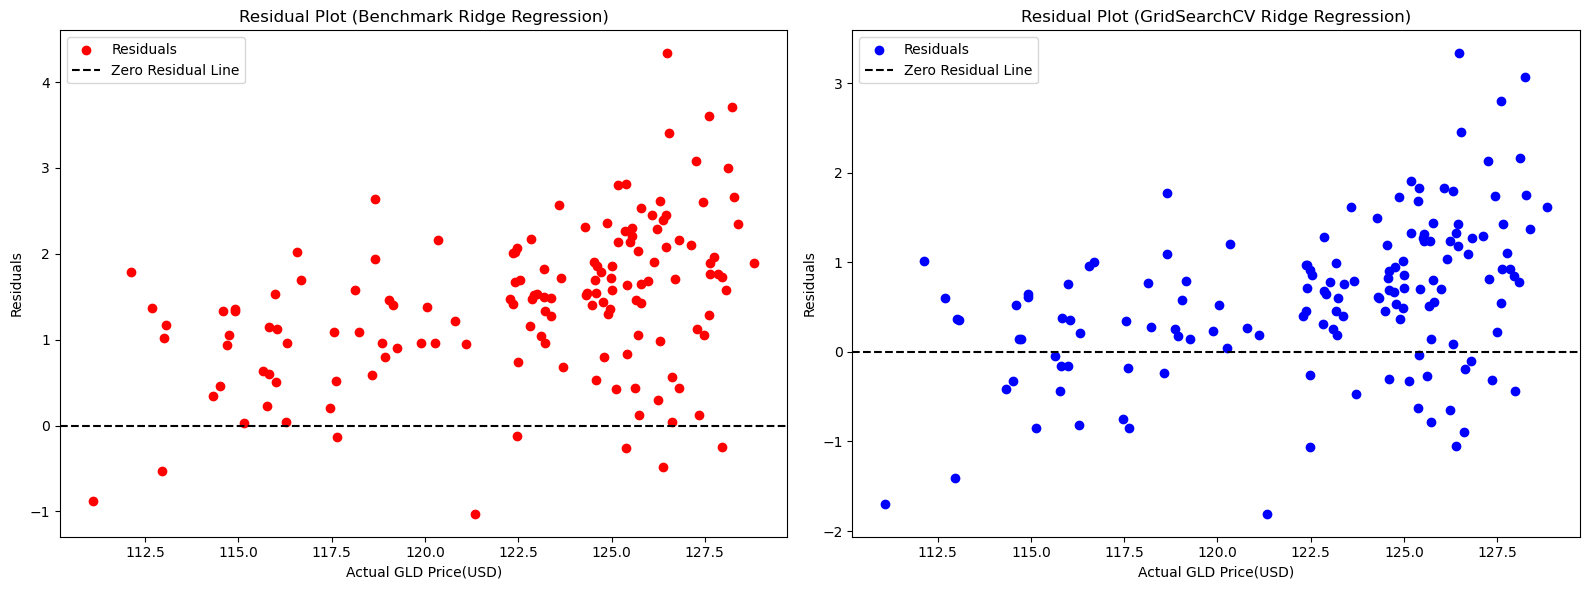

In [54]:
# Make predictions on the test data for both Ridge Regression models
benchmark_test_predictions_ridge = benchmark_rdReg.predict(X_test)
grid_search_test_predictions_ridge = ridge_GS.best_estimator_.predict(X_test)

# Calculate residuals for both Ridge Regression models
benchmark_residuals_ridge = y_test - benchmark_test_predictions_ridge
grid_search_residuals_ridge = y_test - grid_search_test_predictions_ridge

# Create two residual plots side by side
plt.figure(figsize=(16, 6))

# Residual plot for Benchmark Ridge Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, benchmark_residuals_ridge, color='red', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--', label='Zero Residual Line')
plt.xlabel('Actual GLD Price(USD)')
plt.ylabel('Residuals')
plt.title('Residual Plot (Benchmark Ridge Regression)')
plt.legend()

# Residual plot for GridSearchCV Ridge Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, grid_search_residuals_ridge, color='blue', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--', label='Zero Residual Line')
plt.xlabel('Actual GLD Price(USD)')
plt.ylabel('Residuals')
plt.title('Residual Plot (GridSearchCV Ridge Regression)')
plt.legend()

plt.tight_layout()
plt.show()


In [55]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Create a list of Ridge Regression models to evaluate
ridge_models = [benchmark_rdReg, ridge_GS.best_estimator_]
ridge_model_names = ["Benchmark Ridge Regression", "GridSearchCV Ridge Regression"]

# Initialize lists to store metrics for each Ridge Regression model
ridge_rmse_scores = []
ridge_r2_scores = []
ridge_mae_scores = []
ridge_mse_scores = []

for model, model_name in zip(ridge_models, ridge_model_names):
    # Make predictions
    ridge_predictions = model.predict(validation_X)
    
    # Calculate evaluation metrics
    ridge_rmse = np.sqrt(mean_squared_error(validation_y, ridge_predictions))
    ridge_r2 = r2_score(validation_y, ridge_predictions)
    ridge_mae = mean_absolute_error(validation_y, ridge_predictions)
    ridge_mse = mean_squared_error(validation_y, ridge_predictions)
    
 
    # Append the metrics to their respective lists
    ridge_rmse_scores.append(ridge_rmse)
    ridge_r2_scores.append(ridge_r2)
    ridge_mae_scores.append(ridge_mae)
    ridge_mse_scores.append(ridge_mse)
    
    # Print metrics for the current Ridge Regression model
    print(f'Model: {model_name}')
    print('Root Mean Squared Error:', ridge_rmse)
    print('R-squared:', ridge_r2)
    print('Mean Absolute Error:', ridge_mae)
    print('Mean Squared Error:', ridge_mse)
    print('\n')


Model: Benchmark Ridge Regression
Root Mean Squared Error: 0.8336139878517118
R-squared: 0.8399408603702085
Mean Absolute Error: 0.6286200955660931
Mean Squared Error: 0.6949122807420339


Model: GridSearchCV Ridge Regression
Root Mean Squared Error: 0.7186272522044707
R-squared: 0.8810518048114648
Mean Absolute Error: 0.5628518338008969
Mean Squared Error: 0.5164251276109479




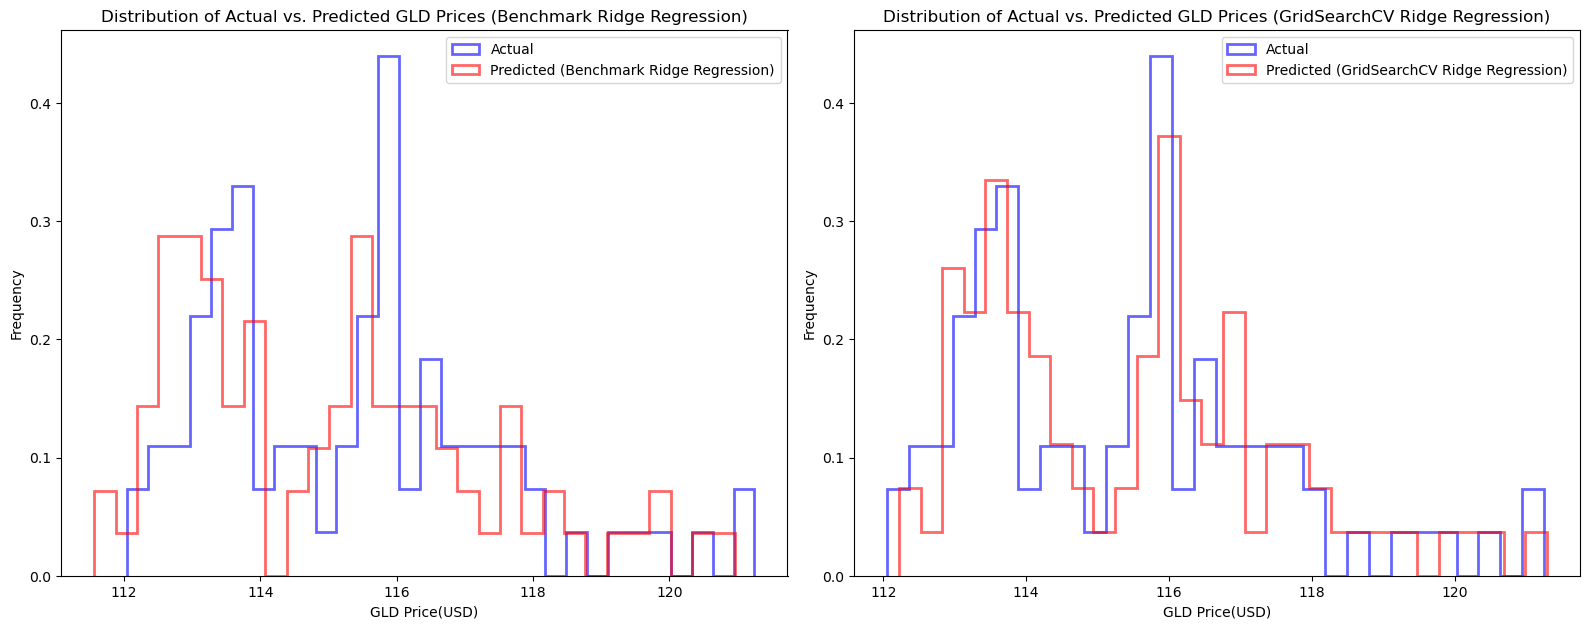

In [56]:
# Create Distribution Plots for actual vs. predicted values for Ridge Regression models
plt.figure(figsize=(16, 12))

for i, (model, model_name) in enumerate(zip(ridge_models, ridge_model_names), 1):
    # Make predictions for the current Ridge Regression model
    ridge_validation_predictions = model.predict(validation_X)
    
    # Create subplots
    plt.subplot(2, 2, i)
    
    # Actual vs. Predicted values distribution for Ridge Regression
    plt.hist(validation_y, bins=30, color='blue', alpha=0.6, label='Actual', density=True, histtype='step', lw=2)
    plt.hist(ridge_validation_predictions, bins=30, color='red', alpha=0.6, label=f'Predicted ({model_name})', density=True, histtype='step', lw=2)

    plt.xlabel('GLD Price(USD)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Actual vs. Predicted GLD Prices ({model_name})')
    plt.legend()

plt.tight_layout()
plt.show()


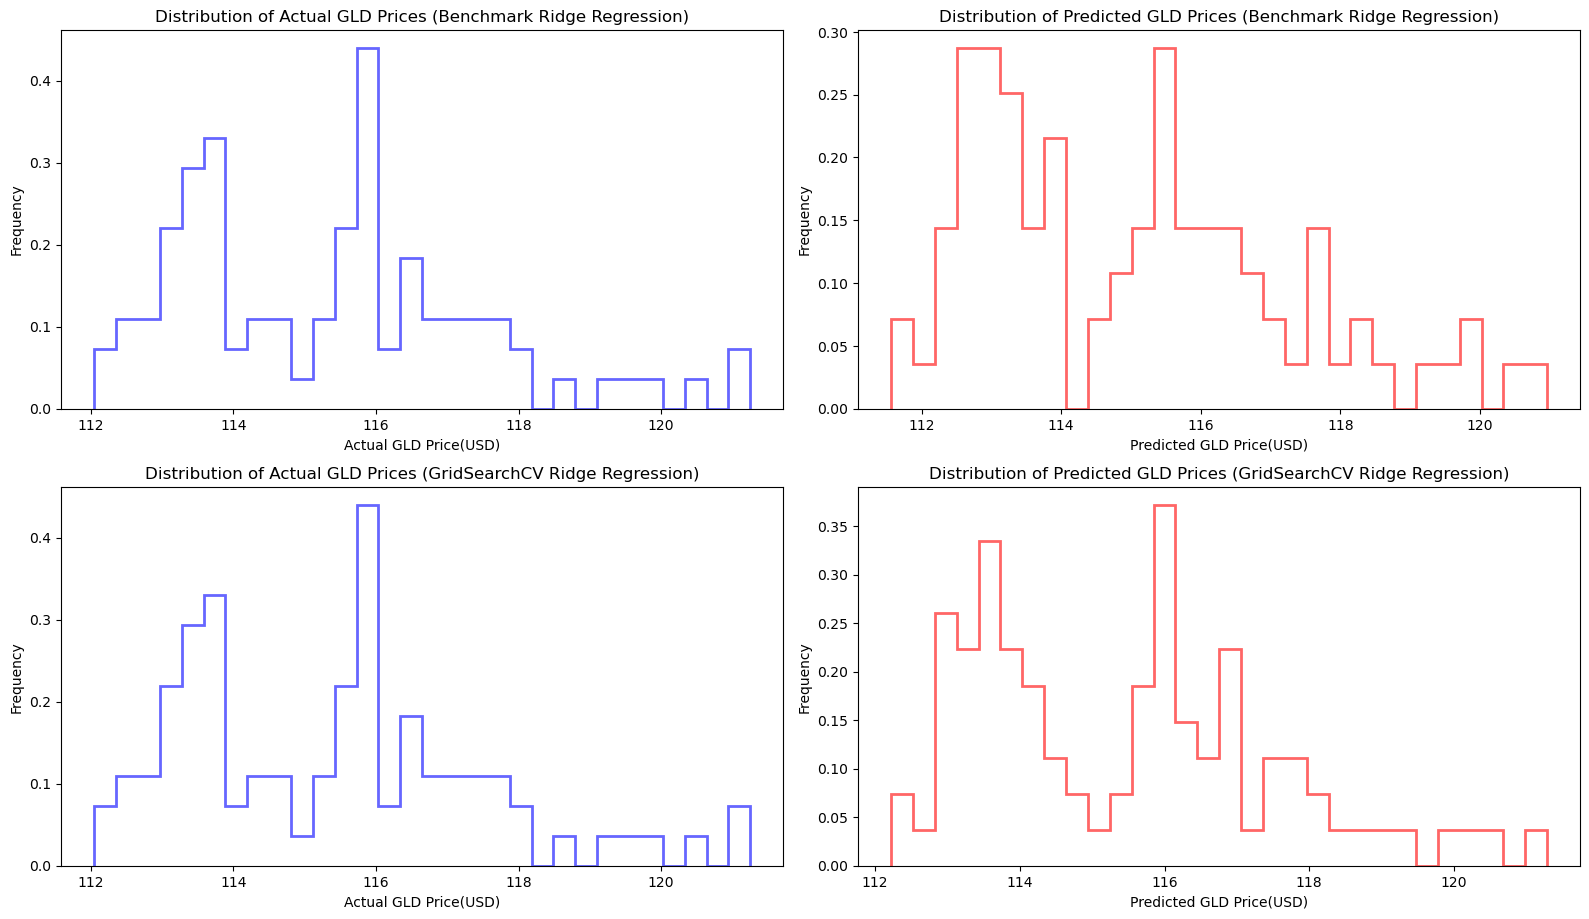

In [57]:
# Create Distribution Plots for actual and predicted values for Ridge Regression models
plt.figure(figsize=(16, 18))

for i, (model, model_name) in enumerate(zip(ridge_models, ridge_model_names), 1):
    # Make predictions for the current Ridge Regression model
    ridge_validation_predictions = model.predict(validation_X)
    
    # Create subplots for actual values distribution
    plt.subplot(4, 2, i * 2 - 1)
    
    # Actual values distribution
    plt.hist(validation_y, bins=30, color='blue', alpha=0.6, label='Actual', density=True, histtype='step', lw=2)
    plt.xlabel('Actual GLD Price(USD)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Actual GLD Prices ({model_name})')
    
    # Create subplots for predicted values distribution
    plt.subplot(4, 2, i * 2)
    
    # Predicted values distribution
    plt.hist(ridge_validation_predictions, bins=30, color='red', alpha=0.6, label=f'Predicted ({model_name})', density=True, histtype='step', lw=2)
    plt.xlabel('Predicted GLD Price(USD)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Predicted GLD Prices ({model_name})')

plt.tight_layout()
plt.show()


In [58]:
solution_models['Ridge_Regression'] = ridge_GS

# Random Forest

Best Hyperparameters for Decision Tree Regressor:
{'max_depth': 7, 'max_features': 'auto', 'n_estimators': 20}


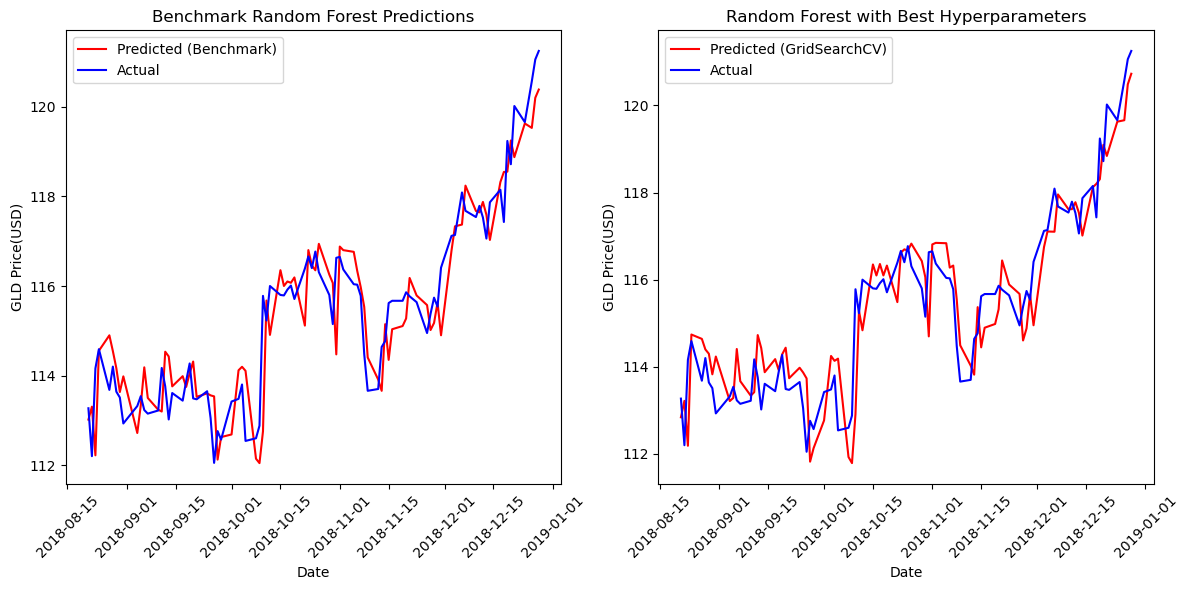

In [59]:
# Save all soultion models
import warnings

solution_models = {}
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

randomForest = RandomForestRegressor(n_estimators=100, random_state=0)
benchmark_rdForest = randomForest.fit(X_train,y_train)
    
random_forest_parameters = {
    'n_estimators':[10,15,20, 50, 100],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[2, 3, 5, 7,10],
}


RandomForest_grid_search = GridSearchCV(estimator=randomForest,
                           param_grid=random_forest_parameters,
                           cv=ts_split,
)

rdForest_GS = RandomForest_grid_search.fit(X_train, y_train)

print("Best Hyperparameters for Decision Tree Regressor:")
print(rdForest_GS.best_params_)

# Create two subplots
plt.figure(figsize=(12, 6))

# Benchmark Decision Tree
plt.subplot(1, 2, 1)
benchmark_predictions = benchmark_rdForest.predict(validation_X)
plt.plot(validation_y.index, benchmark_predictions, 'r', label='Predicted (Benchmark)')
plt.plot(validation_y.index, validation_y, 'b', label='Actual')
plt.xlabel('Date')
plt.ylabel('GLD Price(USD)')
plt.title('Benchmark Random Forest Predictions')
plt.xticks(rotation=45)
plt.legend()

# GridSearchCV Decision Tree
plt.subplot(1, 2, 2)
rdForest_GS_predictions = rdForest_GS.best_estimator_.predict(validation_X)
plt.plot(validation_y.index, rdForest_GS_predictions, 'r', label='Predicted (GridSearchCV)')
plt.plot(validation_y.index, validation_y, 'b', label='Actual')
plt.xlabel('Date')
plt.ylabel('GLD Price(USD)')
plt.title('Random Forest with Best Hyperparameters')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

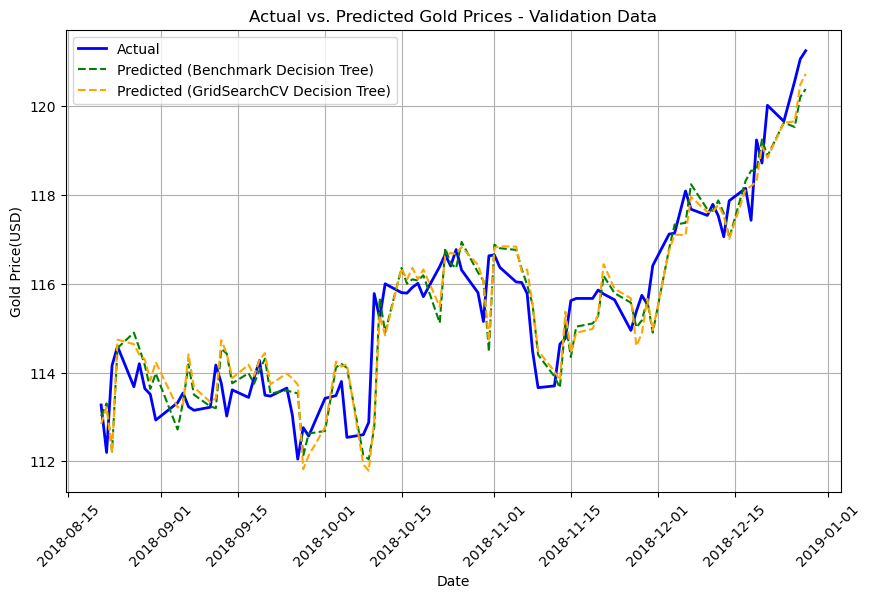

In [60]:
# Make predictions on the validation data for both models
benchmark_predictions = benchmark_rdForest.predict(validation_X)
grid_search_predictions = rdForest_GS.best_estimator_.predict(validation_X)

# Create line plots for the actual vs. predicted values on validation data for both models
plt.figure(figsize=(10, 6))
plt.plot(validation_y.index, validation_y, color='blue', label='Actual', linewidth=2)
plt.plot(validation_y.index, benchmark_predictions, color='green', label='Predicted (Benchmark Decision Tree)', linestyle='--')
plt.plot(validation_y.index, grid_search_predictions, color='orange', label='Predicted (GridSearchCV Decision Tree)', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Gold Price(USD)')
plt.title('Actual vs. Predicted Gold Prices - Validation Data')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.show()

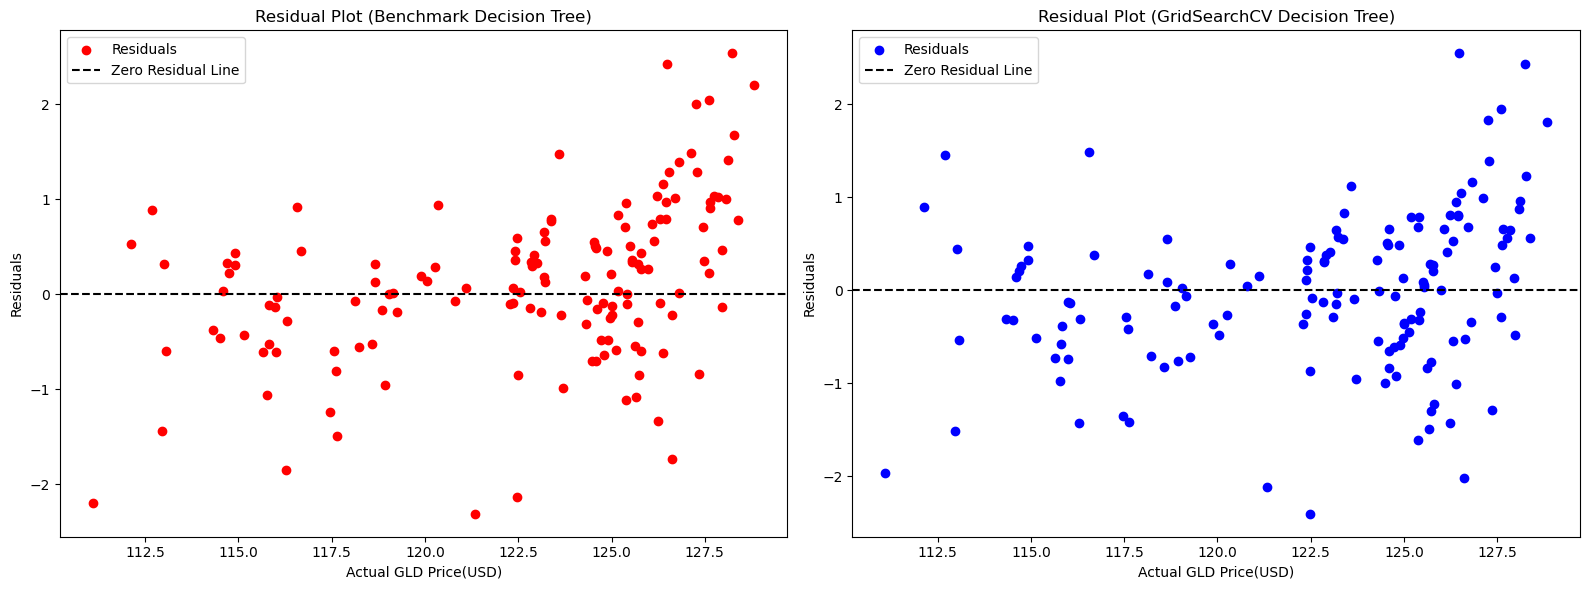

In [61]:
# Make predictions on the test data for both models
benchmark_test_predictions_rf = benchmark_rdForest.predict(X_test)
grid_search_test_predictions_rf = rdForest_GS.predict(X_test)

# Calculate residuals for both models
benchmark_residuals_rf = y_test - benchmark_test_predictions_rf
grid_search_residuals_rf = y_test - grid_search_test_predictions_rf

# Create two residual plots side by side
plt.figure(figsize=(16, 6))

# Residual plot for Benchmark Decision Tree
plt.subplot(1, 2, 1)
plt.scatter(y_test, benchmark_residuals_rf, color='red', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--', label='Zero Residual Line')
plt.xlabel('Actual GLD Price(USD)')
plt.ylabel('Residuals')
plt.title('Residual Plot (Benchmark Decision Tree)')
plt.legend()

# Residual plot for GridSearchCV Decision Tree
plt.subplot(1, 2, 2)
plt.scatter(y_test, grid_search_residuals_rf, color='blue', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--', label='Zero Residual Line')
plt.xlabel('Actual GLD Price(USD)')
plt.ylabel('Residuals')
plt.title('Residual Plot (GridSearchCV Decision Tree)')
plt.legend()

plt.tight_layout()
plt.show()


In [62]:
from sklearn import metrics

# Create a list of models to evaluate
models = [benchmark_rdForest, rdForest_GS]
model_names = ["Benchmark Random Forest", "GridSearchCV Random Forest"]

# Initialize lists to store metrics for each model
rmse_scores = []
r2_scores = []
mae_scores = []
mse_scores = []

for model, model_name in zip(models, model_names):
    # Make predictions
    predictions = model.predict(validation_X)
    
    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(validation_y, predictions))
    r2 = r2_score(validation_y, predictions)
    mae = metrics.mean_absolute_error(validation_y, predictions)
    mse = metrics.mean_squared_error(validation_y, predictions)
    
    # Append the metrics to their respective lists
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    
    # Print metrics for the current model
    print(f'Model: {model_name}')
    print('Root Mean Squared Error:', rmse)
    print('R-squared:', r2)
    print('Mean Absolute Error:', mae)
    print('Mean Squared Error:', mse)
    print('\n')

Model: Benchmark Random Forest
Root Mean Squared Error: 0.8088131106739898
R-squared: 0.8493230376487888
Mean Absolute Error: 0.6239331731460753
Mean Squared Error: 0.6541786479981356


Model: GridSearchCV Random Forest
Root Mean Squared Error: 0.8221622242794646
R-squared: 0.8443082757939838
Mean Absolute Error: 0.6528644472563901
Mean Squared Error: 0.6759507230321566




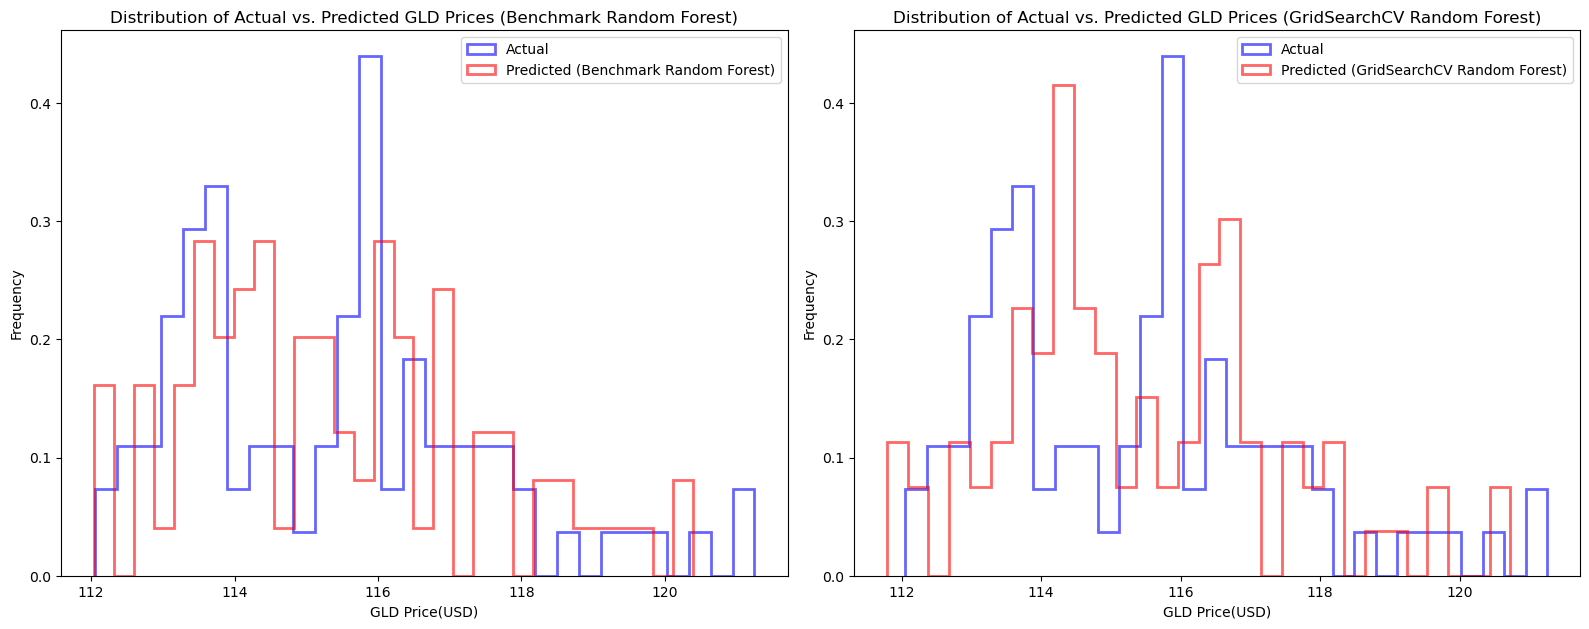

In [63]:
models = [benchmark_rdForest, rdForest_GS]
model_names = ["Benchmark Random Forest", "GridSearchCV Random Forest"]

# Create Distribution Plots for actual vs. predicted values
plt.figure(figsize=(16, 12))

for i, (model, model_name) in enumerate(zip(models, model_names), 1):
    # Make predictions for the current model
    validation_predictions = model.predict(validation_X)
    
    # Create subplots
    plt.subplot(2, 2, i)
    
    # Actual vs. Predicted values distribution
    plt.hist(validation_y, bins=30, color='blue', alpha=0.6, label='Actual', density=True, histtype='step', lw=2)
    plt.hist(validation_predictions, bins=30, color='red', alpha=0.6, label=f'Predicted ({model_name})', density=True, histtype='step', lw=2)

    plt.xlabel('GLD Price(USD)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Actual vs. Predicted GLD Prices ({model_name})')
    plt.legend()

plt.tight_layout()
plt.show()

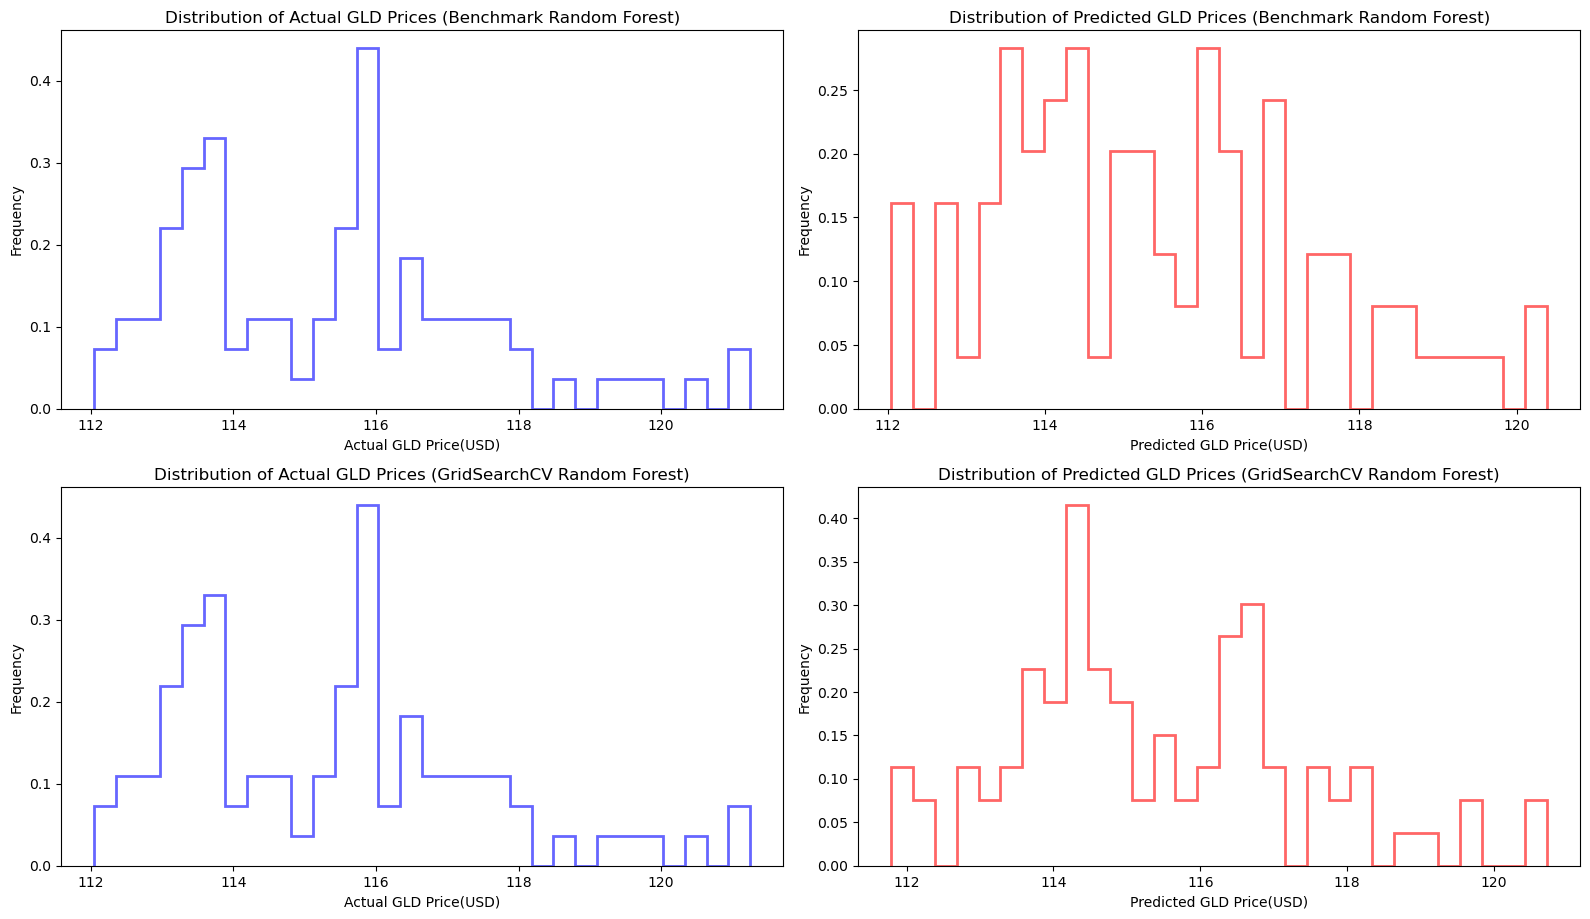

In [64]:
models = [benchmark_rdForest, rdForest_GS]
model_names = ["Benchmark Random Forest", "GridSearchCV Random Forest"]

# Create Distribution Plots for actual and predicted values
plt.figure(figsize=(16, 18))

for i, (model, model_name) in enumerate(zip(models, model_names), 1):
    # Make predictions for the current model
    validation_predictions = model.predict(validation_X)
    
    # Create subplots for actual vs. predicted values
    plt.subplot(4, 2, i * 2 - 1)
    
    # Actual values distribution
    plt.hist(validation_y, bins=30, color='blue', alpha=0.6, label='Actual', density=True, histtype='step', lw=2)
    plt.xlabel('Actual GLD Price(USD)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Actual GLD Prices ({model_name})')
    
    # Create subplots for actual vs. predicted values
    plt.subplot(4, 2, i * 2)
    
    # Predicted values distribution
    plt.hist(validation_predictions, bins=30, color='red', alpha=0.6, label=f'Predicted ({model_name})', density=True, histtype='step', lw=2)
    plt.xlabel('Predicted GLD Price(USD)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Predicted GLD Prices ({model_name})')

plt.tight_layout()
plt.show()

In [65]:
solution_models['Random_Forest'] = rdForest_GS

# SVR

Best Hyperparameters for Support Vector Regressor:
{'C': 10.0, 'epsilon': 0}


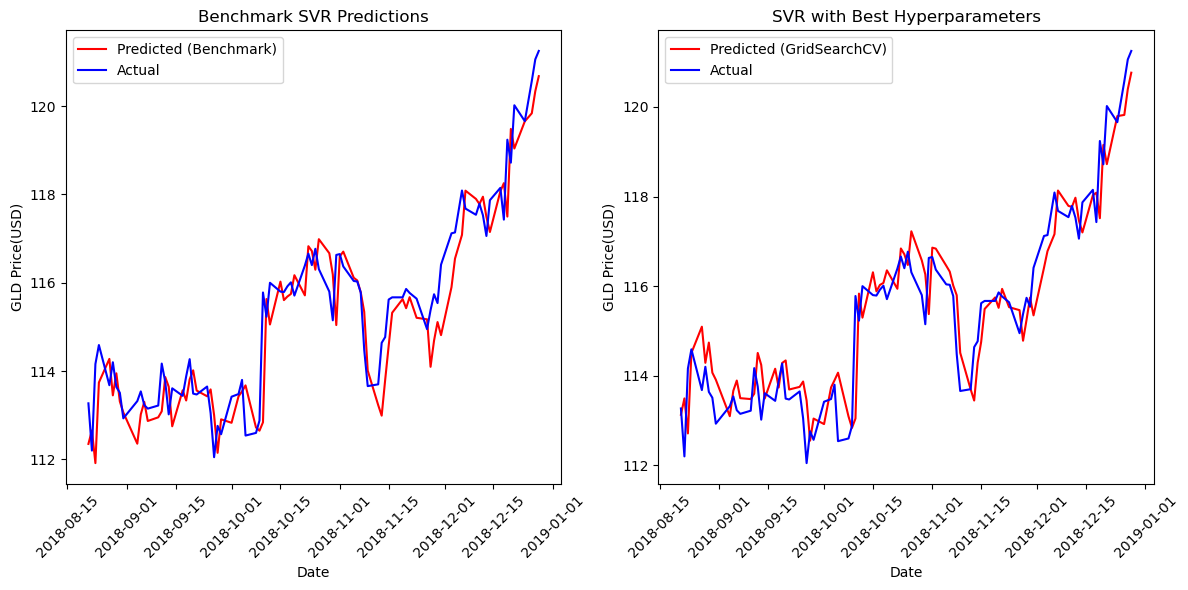

In [66]:
solution_models = {}

# Create an SVR model
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.2)  # You can adjust the hyperparameters
benchmark_svr = svr_model.fit(X_train, y_train)

# Define the hyperparameter grid
linear_svr_parameters = {
    'C':[0.5, 1.0, 10.0, 50.0],
    'epsilon':[0, 0.1, 0.5, 0.7, 0.9],
}

svr_grid_search = GridSearchCV(estimator=svr_model,
                           param_grid=linear_svr_parameters,
                           cv=ts_split,
)

svr_GS = svr_grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters for Support Vector Regressor:")
print(svr_GS.best_params_)

# Create two subplots
plt.figure(figsize=(12, 6))

# Benchmark Decision Tree
plt.subplot(1, 2, 1)
benchmark_predictions = benchmark_svr.predict(validation_X)
plt.plot(validation_y.index, benchmark_predictions, 'r', label='Predicted (Benchmark)')
plt.plot(validation_y.index, validation_y, 'b', label='Actual')
plt.xlabel('Date')
plt.ylabel('GLD Price(USD)')
plt.title('Benchmark SVR Predictions')
plt.xticks(rotation=45)
plt.legend()

# GridSearchCV Decision Tree
plt.subplot(1, 2, 2)
rdForest_GS_predictions = svr_GS.best_estimator_.predict(validation_X)
plt.plot(validation_y.index, rdForest_GS_predictions, 'r', label='Predicted (GridSearchCV)')
plt.plot(validation_y.index, validation_y, 'b', label='Actual')
plt.xlabel('Date')
plt.ylabel('GLD Price(USD)')
plt.title('SVR with Best Hyperparameters')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

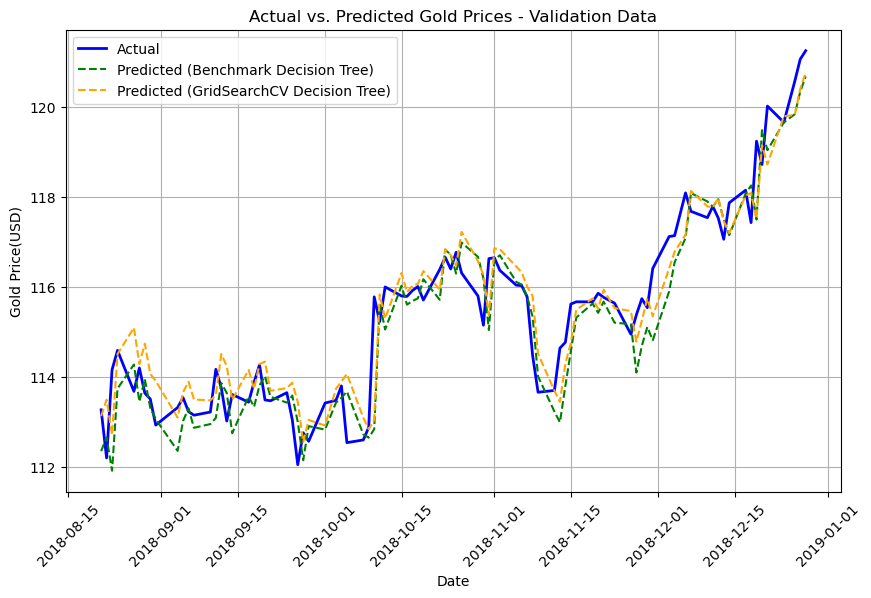

In [67]:
# Make predictions on the validation data for both models
benchmark_predictions = benchmark_svr.predict(validation_X)
grid_search_predictions = svr_GS.best_estimator_.predict(validation_X)

# Create line plots for the actual vs. predicted values on validation data for both models
plt.figure(figsize=(10, 6))
plt.plot(validation_y.index, validation_y, color='blue', label='Actual', linewidth=2)
plt.plot(validation_y.index, benchmark_predictions, color='green', label='Predicted (Benchmark Decision Tree)', linestyle='--')
plt.plot(validation_y.index, grid_search_predictions, color='orange', label='Predicted (GridSearchCV Decision Tree)', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Gold Price(USD)')
plt.title('Actual vs. Predicted Gold Prices - Validation Data')
plt.legend()
plt.grid()
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.show()

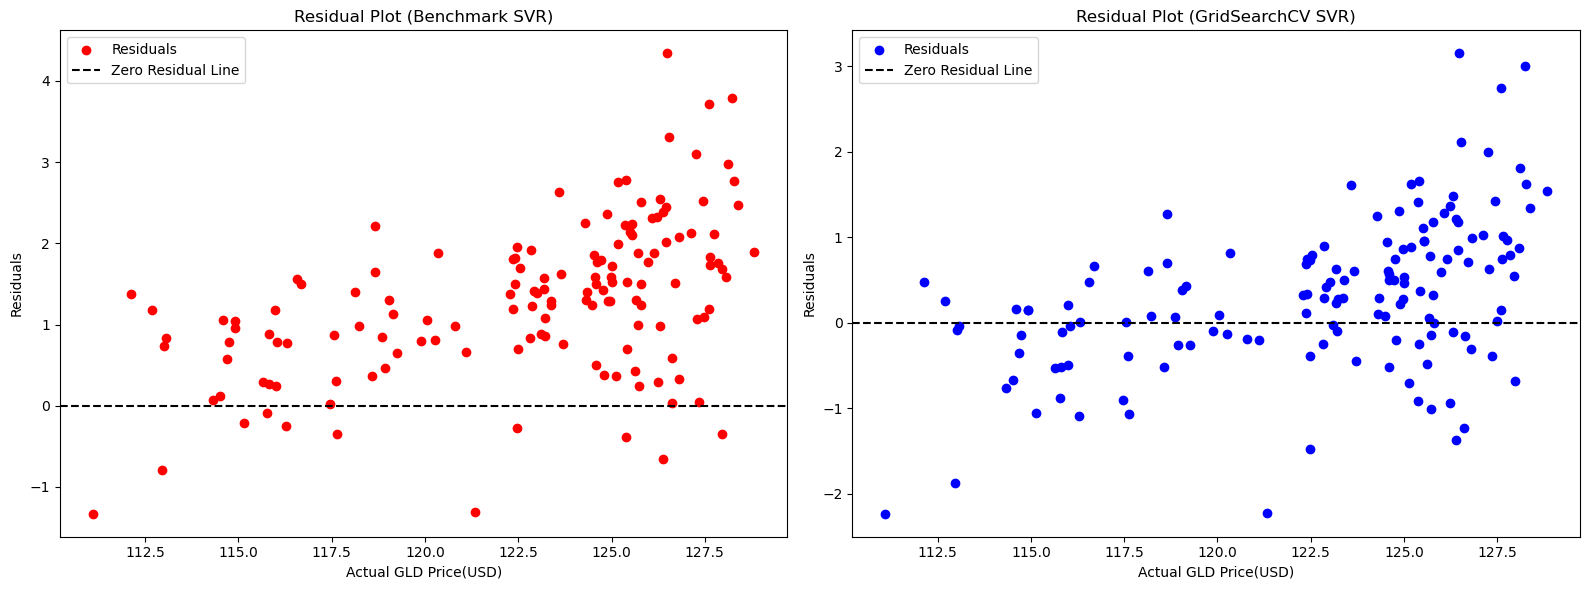

In [68]:
# Make predictions on the test data for both models
benchmark_test_predictions_svr = benchmark_svr.predict(X_test)
grid_search_test_predictions_svr = svr_GS.predict(X_test)

# Calculate residuals for both models
benchmark_residuals_svr = y_test - benchmark_test_predictions_svr
grid_search_residuals_svr = y_test - grid_search_test_predictions_svr

# Create two residual plots side by side
plt.figure(figsize=(16, 6))

# Residual plot for Benchmark Decision Tree
plt.subplot(1, 2, 1)
plt.scatter(y_test, benchmark_residuals_svr, color='red', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--', label='Zero Residual Line')
plt.xlabel('Actual GLD Price(USD)')
plt.ylabel('Residuals')
plt.title('Residual Plot (Benchmark SVR)')
plt.legend()

# Residual plot for GridSearchCV Decision Tree
plt.subplot(1, 2, 2)
plt.scatter(y_test, grid_search_residuals_svr, color='blue', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--', label='Zero Residual Line')
plt.xlabel('Actual GLD Price(USD)')
plt.ylabel('Residuals')
plt.title('Residual Plot (GridSearchCV SVR)')
plt.legend()

plt.tight_layout()
plt.show()

In [69]:
from sklearn import metrics

# Create a list of models to evaluate
models = [benchmark_svr, svr_GS]
model_names = ["Benchmark SVR", "GridSearchCV SVR"]

# Initialize lists to store metrics for each model
rmse_scores = []
r2_scores = []
mae_scores = []
mse_scores = []

for model, model_name in zip(models, model_names):
    # Make predictions
    predictions = model.predict(validation_X)
    
    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(validation_y, predictions))
    r2 = r2_score(validation_y, predictions)
    mae = metrics.mean_absolute_error(validation_y, predictions)
    mse = metrics.mean_squared_error(validation_y, predictions)
    
    # Append the metrics to their respective lists
    rmse_scores.append(rmse)
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    
    # Print metrics for the current model
    print(f'Model: {model_name}')
    print('Root Mean Squared Error:', rmse)
    print('R-squared:', r2)
    print('Mean Absolute Error:', mae)
    print('Mean Squared Error:', mse)
    print('\n')

Model: Benchmark SVR
Root Mean Squared Error: 0.7809436571347543
R-squared: 0.859527958179144
Mean Absolute Error: 0.5936703952408275
Mean Squared Error: 0.6098729956190048


Model: GridSearchCV SVR
Root Mean Squared Error: 0.7417766706101224
R-squared: 0.8732649232939584
Mean Absolute Error: 0.5683514917491026
Mean Squared Error: 0.5502326290614381




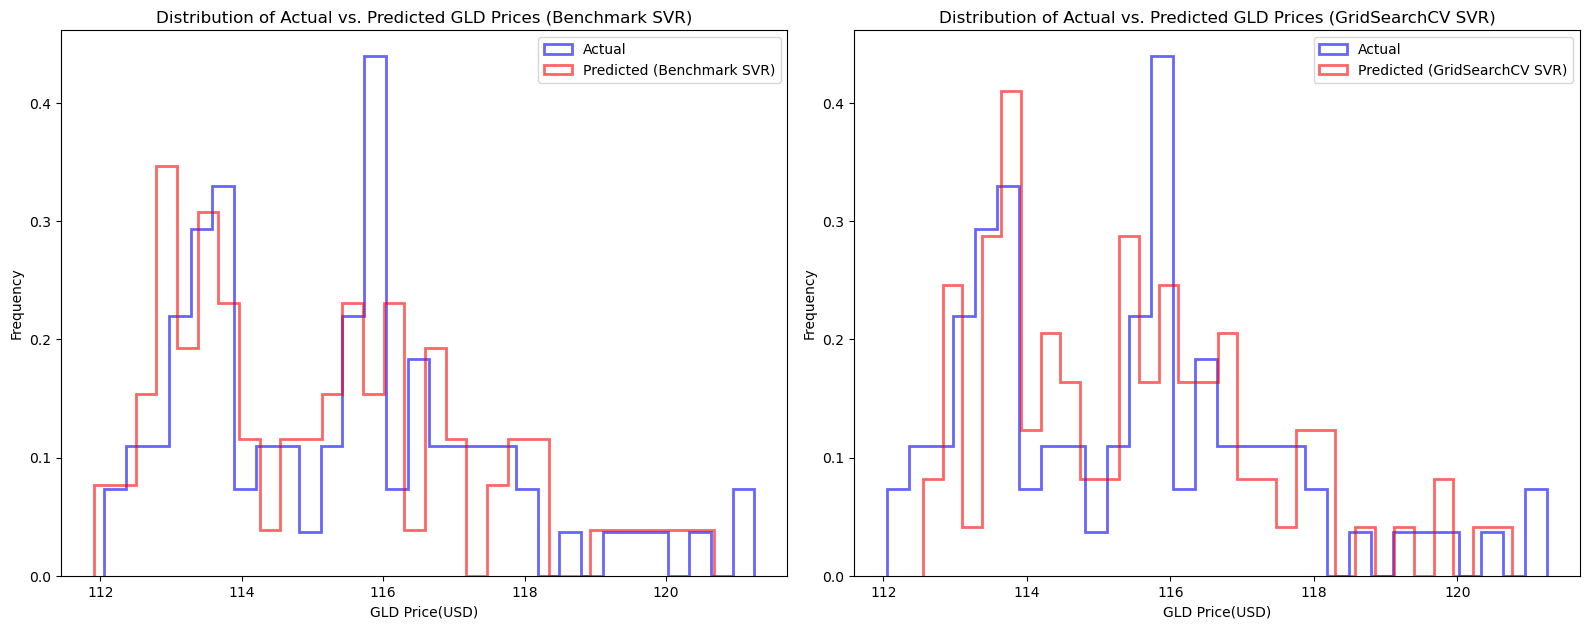

In [70]:
models = [benchmark_svr, svr_GS]
model_names = ["Benchmark SVR", "GridSearchCV SVR"]

# Create Distribution Plots for actual vs. predicted values
plt.figure(figsize=(16, 12))

for i, (model, model_name) in enumerate(zip(models, model_names), 1):
    # Make predictions for the current model
    validation_predictions = model.predict(validation_X)
    
    # Create subplots
    plt.subplot(2, 2, i)
    
    # Actual vs. Predicted values distribution
    plt.hist(validation_y, bins=30, color='blue', alpha=0.6, label='Actual', density=True, histtype='step', lw=2)
    plt.hist(validation_predictions, bins=30, color='red', alpha=0.6, label=f'Predicted ({model_name})', density=True, histtype='step', lw=2)

    plt.xlabel('GLD Price(USD)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Actual vs. Predicted GLD Prices ({model_name})')
    plt.legend()

plt.tight_layout()
plt.show()

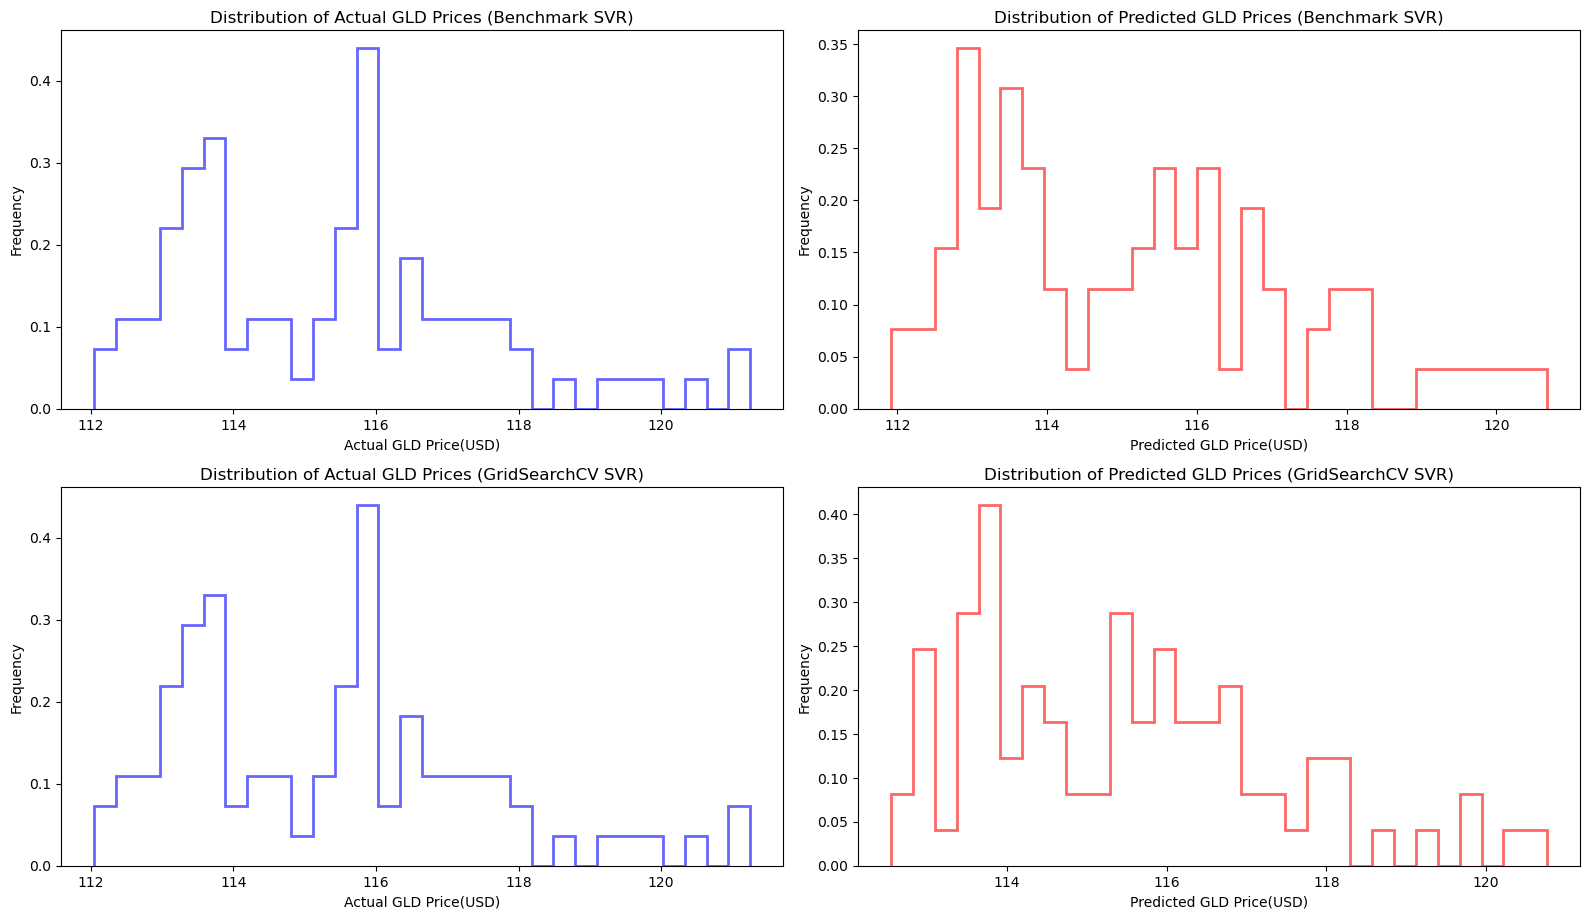

In [71]:
models = [benchmark_svr, svr_GS]
model_names = ["Benchmark SVR", "GridSearchCV SVR"]

# Create Distribution Plots for actual and predicted values
plt.figure(figsize=(16, 18))

for i, (model, model_name) in enumerate(zip(models, model_names), 1):
    # Make predictions for the current model
    validation_predictions = model.predict(validation_X)
    
    # Create subplots for actual vs. predicted values
    plt.subplot(4, 2, i * 2 - 1)
    
    # Actual values distribution
    plt.hist(validation_y, bins=30, color='blue', alpha=0.6, label='Actual', density=True, histtype='step', lw=2)
    plt.xlabel('Actual GLD Price(USD)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Actual GLD Prices ({model_name})')
    
    # Create subplots for actual vs. predicted values
    plt.subplot(4, 2, i * 2)
    
    # Predicted values distribution
    plt.hist(validation_predictions, bins=30, color='red', alpha=0.6, label=f'Predicted ({model_name})', density=True, histtype='step', lw=2)
    plt.xlabel('Predicted GLD Price(USD)')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Predicted GLD Prices ({model_name})')

plt.tight_layout()
plt.show()

In [72]:
solution_models['Decision Tree'] = dtree_GS

In [73]:
solution_models['Random Forest'] = rdForest_GS

In [74]:
solution_models['SVR'] = svr_GS

In [75]:
solution_models['Ridge_Regression'] = ridge_GS

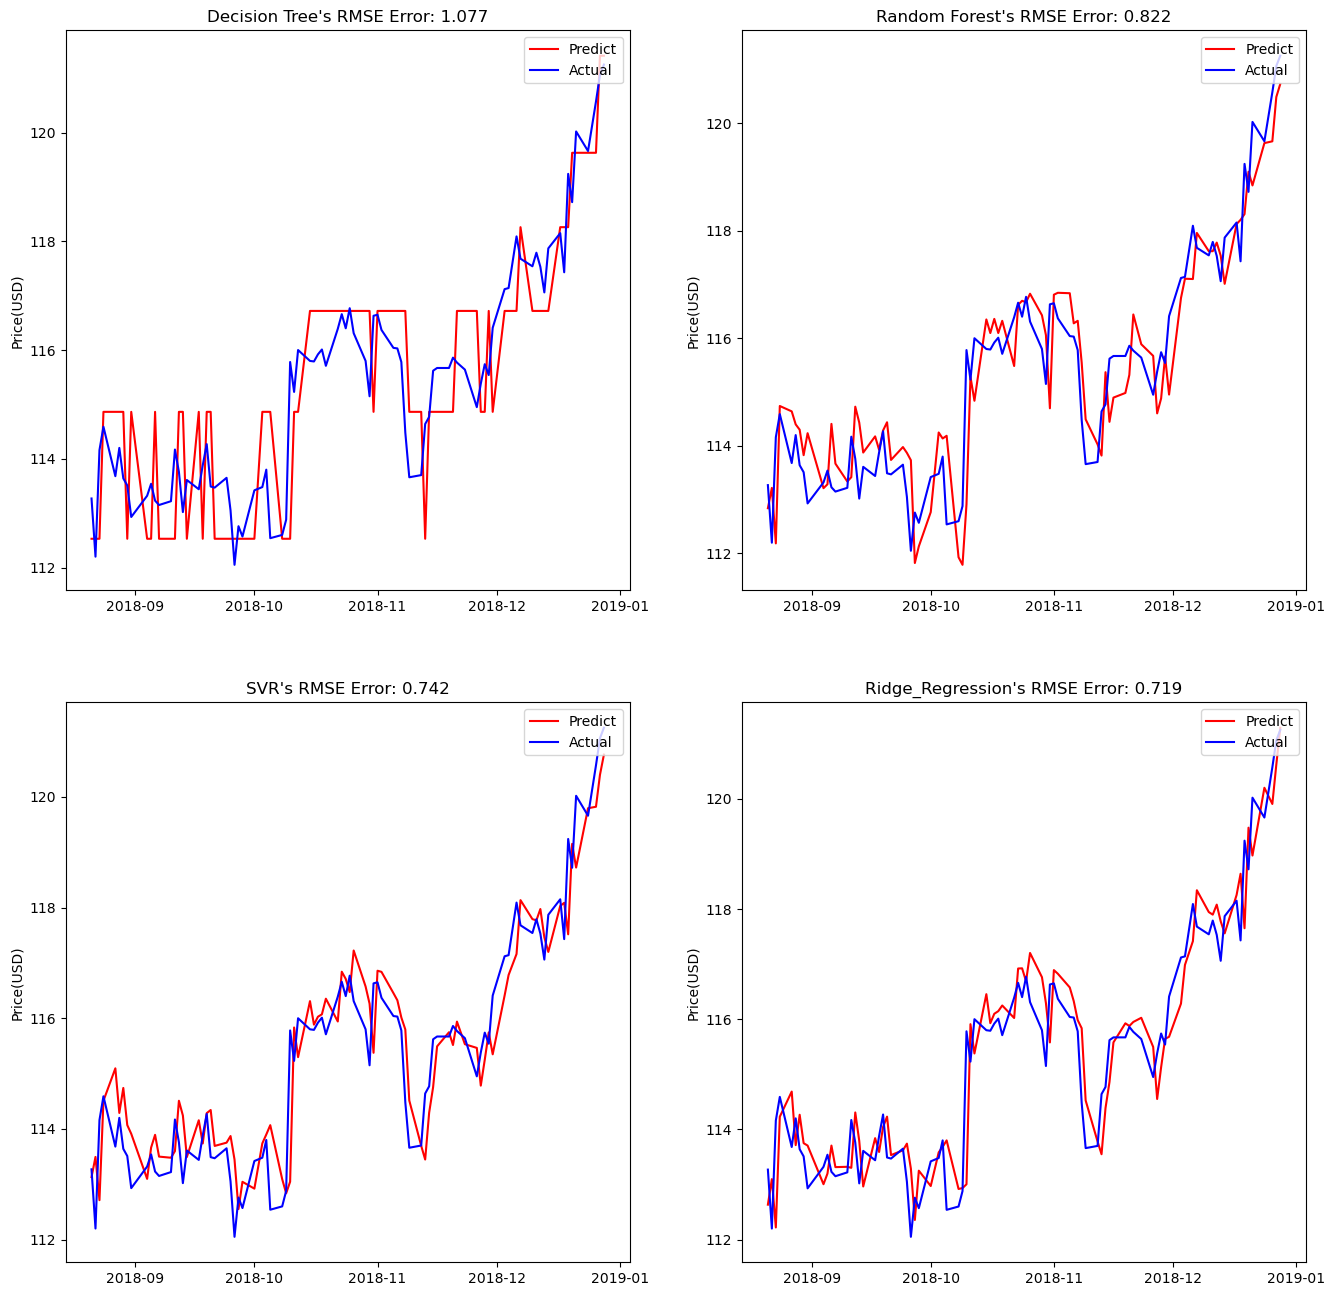

In [76]:
RMSE_scores = {}
def model_review(models):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))

    #plot block
    ax_x = 0
    ax_y = 0
    #plot solution model
    for name, model in models.items():
        predicted = model.predict(validation_X)
        RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))

        axes[ax_x][ax_y].plot(validation_y.index, predicted,'r', label='Predict')
        axes[ax_x][ax_y].plot(validation_y.index, validation_y,'b', label='Actual')
        axes[ax_x][ax_y].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        axes[ax_x][ax_y].xaxis.set_major_locator(mdates.MonthLocator())
        axes[ax_x][ax_y].set_ylabel('Price(USD)')
        axes[ax_x][ax_y].set_title(name + "'s RMSE Error: " +"{0:.3f}".format(RSME_score))
        axes[ax_x][ax_y].legend(loc='upper right')
        RMSE_scores[name] = RSME_score
        if ax_x <2:
            if ax_y < 1:
                ax_y += 1
            else:
                ax_x += 1
                ax_y = 0
    plt.show()

model_review(solution_models)

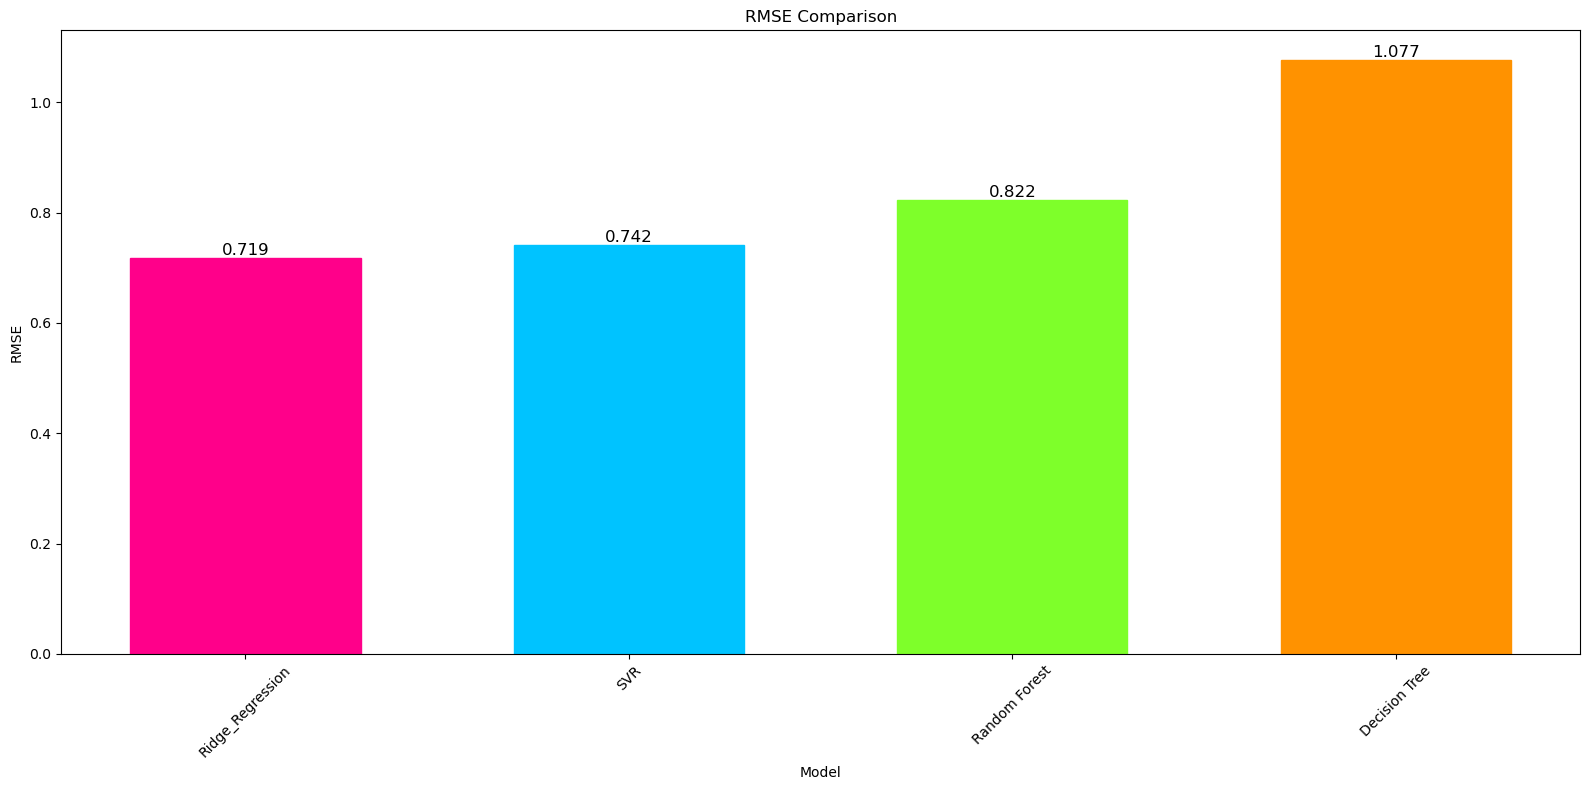

In [77]:
model_names = []
model_values = []
for name, value in RMSE_scores.items():
    model_names.append(name)
    model_values.append(value)

model_values = np.array(model_values)
model_names = np.array(model_names)

indices = np.argsort(model_values)
columns = model_names[indices[:8]]
values = model_values[indices][:8]
# Calculate R-squared values for each model and store them in a dictionary
RMSE_scores = {}
for name, model in solution_models.items():
    predicted = model.predict(validation_X)
    RMSE_score = np.sqrt(mean_squared_error(validation_y, predicted))
    RMSE_scores[name] = RMSE_score

# Create a bar plot for R-squared comparisonD
fig = plt.figure(figsize=(16, 8))

# Extract model names and R-squared values
model_names = list(RMSE_scores.keys())
RMSE_values = list(RMSE_scores.values())

# Define a list of colors for the bars
colors = ['#FF008A', '#00C3FF', '#7EFF2A', '#FF9200']

# Sort the models by R-squared values
indices = np.argsort(RMSE_values)
columns = [model_names[i] for i in indices]
values = [RMSE_values[i] for i in indices]

# Create the bar plot with different colors and annotations
bars = plt.bar(np.arange(len(columns)), values, width=0.6, align="center")
for i, bar in enumerate(bars):
    bar.set_color(colors[i])  # Assign a color to each bar
    plt.text(i, bar.get_height(), f'{values[i]:.3f}', ha='center', va='bottom', fontsize=12)

plt.xticks(np.arange(len(columns)), columns, rotation=45)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE Comparison')

plt.tight_layout()
plt.show()


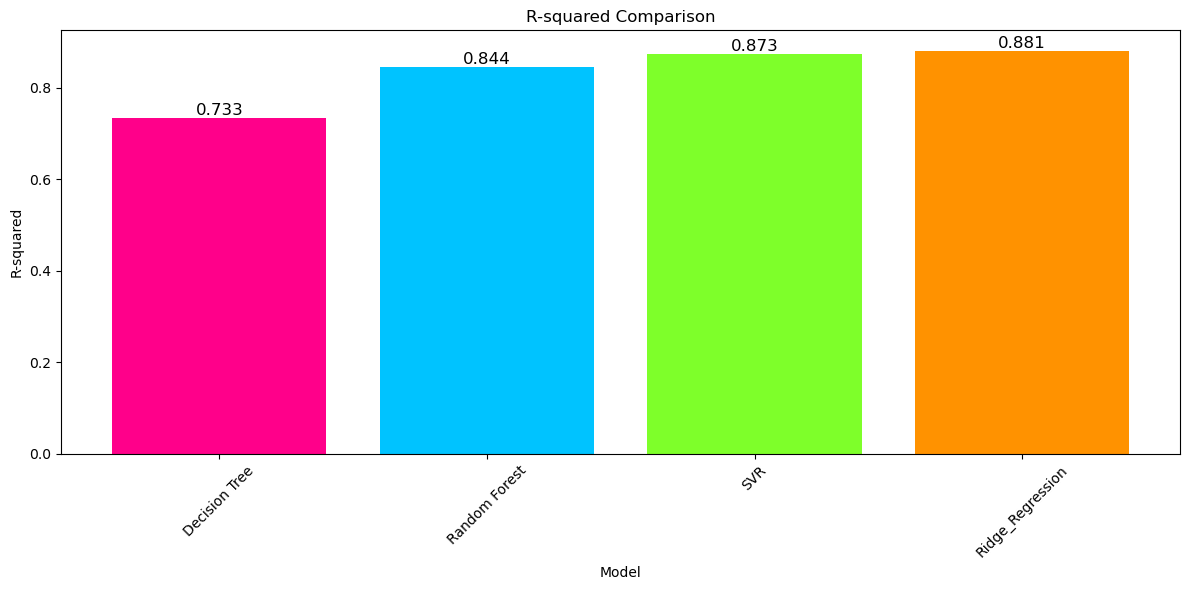

In [78]:
# Calculate R-squared values for each model and store them in a dictionary
R2_scores = {}
for name, model in solution_models.items():
    predicted = model.predict(validation_X)
    R2_score = r2_score(validation_y, predicted)
    R2_scores[name] = R2_score

# Create a bar plot for R-squared comparison
fig, ax = plt.subplots(figsize=(12, 6))

# Extract model names and R-squared values
model_names = list(R2_scores.keys())
r2_values = list(R2_scores.values())

# Define custom colors for the bars
colors = ['#FF008A', '#00C3FF', '#7EFF2A', '#FF9200']

# Create the bar plot
ax.bar(model_names, r2_values, color=colors)

# Annotate the bars with R-squared values
for i, value in enumerate(r2_values):
    ax.text(i, value, f'{value:.3f}', ha='center', va='bottom', fontsize=12)

ax.set_xlabel('Model')
ax.set_ylabel('R-squared')
ax.set_title('R-squared Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

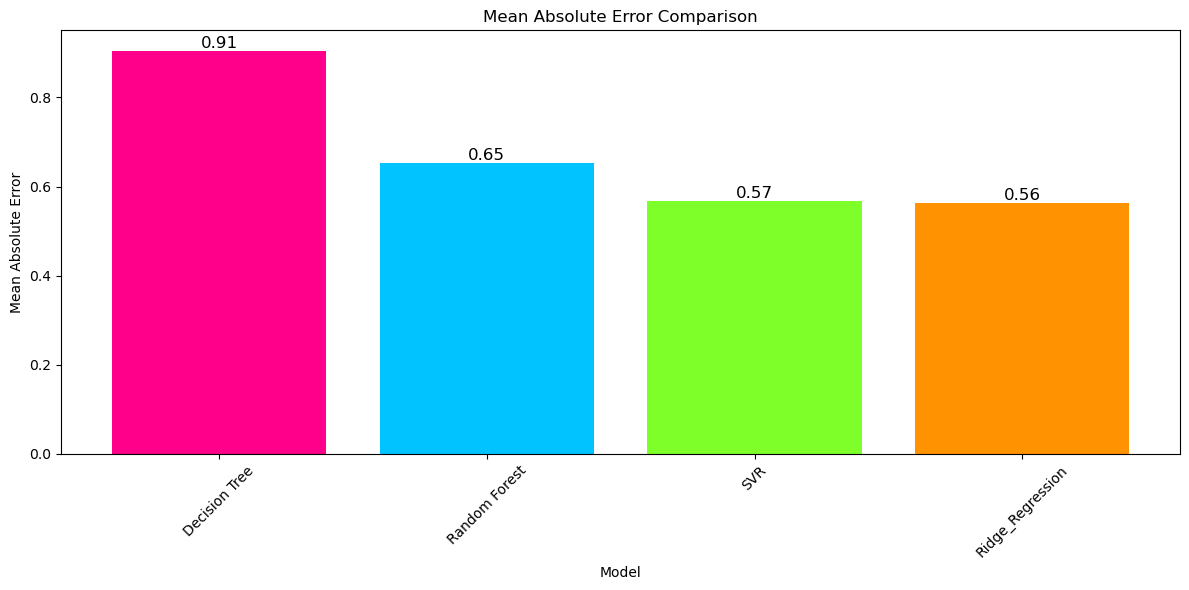

In [79]:
mae_scores = {}
for name, model in solution_models.items():
    predicted = model.predict(validation_X)
    mae_score = metrics.mean_absolute_error(validation_y, predicted)
    mae_scores[name] = mae_score

# Create a bar plot for R-squared comparison
fig, ax = plt.subplots(figsize=(12, 6))

# Extract model names and R-squared values
model_names = list(mae_scores.keys())
mae_values = list(mae_scores.values())

# Define custom colors for the bars
colors = ['#FF008A', '#00C3FF', '#7EFF2A', '#FF9200']

# Create the bar plot
ax.bar(model_names, mae_values, color=colors)

# Annotate the bars with R-squared values
for i, value in enumerate(mae_values):
    ax.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

ax.set_xlabel('Model')
ax.set_ylabel('Mean Absolute Error')
ax.set_title('Mean Absolute Error Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

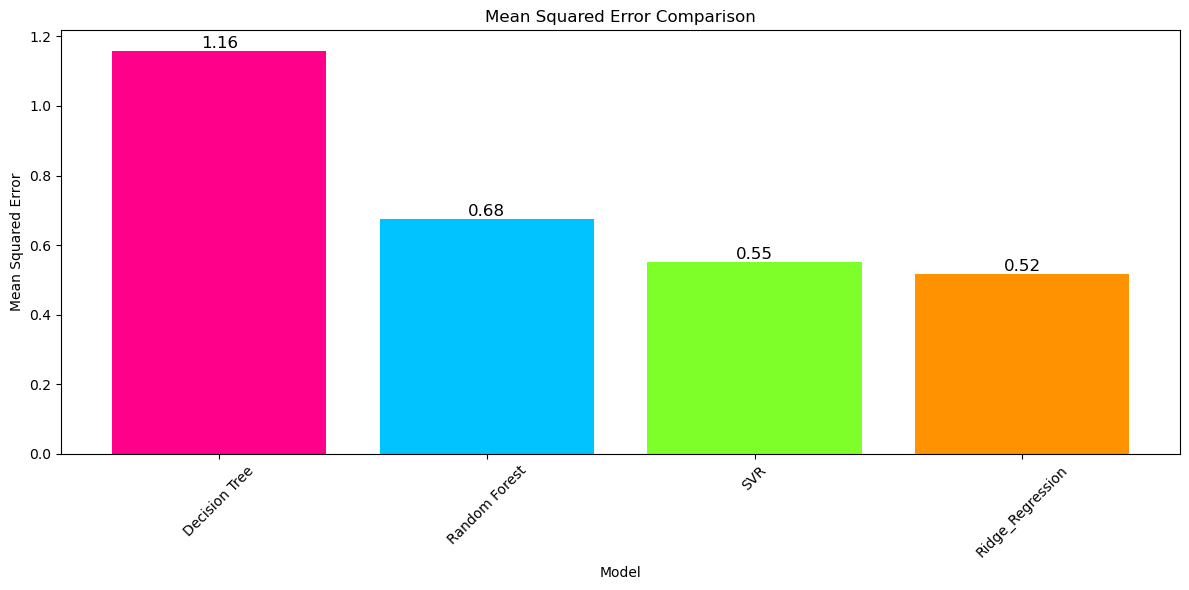

In [80]:
mse_scores = {}
for name, model in solution_models.items():
    predicted = model.predict(validation_X)
    mse_score = metrics.mean_squared_error(validation_y, predicted)
    mse_scores[name] = mse_score

# Create a bar plot for R-squared comparison
fig, ax = plt.subplots(figsize=(12, 6))

# Extract model names and R-squared values
model_names = list(mse_scores.keys())
mse_values = list(mse_scores.values())

# Define custom colors for the bars
colors = ['#FF008A', '#00C3FF', '#7EFF2A', '#FF9200']

# Create the bar plot
ax.bar(model_names, mse_values, color=colors)

# Annotate the bars with R-squared values
for i, value in enumerate(mse_values):
    ax.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

ax.set_xlabel('Model')
ax.set_ylabel('Mean Squared Error')
ax.set_title('Mean Squared Error Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Feature Select
Select whihc as lowest RMSE

In [81]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(ridge_reg)
sfm.fit(feature_minmax_transform, target_adj_close.values.ravel())
display(feature_minmax_transform.head())
sup = sfm.get_support()
zipped = zip(feature_minmax_transform,sup)
print(*zipped)

Open      High       Low    Volume   SP_open   SP_high  \
Date                                                                     
2012-02-06  0.913669  0.912561  0.913193  0.079151  0.037098  0.034927   
2012-02-07  0.919480  0.945539  0.920622  0.109560  0.038247  0.038015   
2012-02-08  0.945490  0.943760  0.925437  0.099173  0.042423  0.039225   
2012-02-09  0.955866  0.949370  0.927775  0.157998  0.045752  0.041465   
2012-02-10  0.907167  0.912014  0.909341  0.095612  0.038187  0.034685   

              SP_low  SP_Ajclose  SP_volume   DJ_open  ...  USO_Volume  \
Date                                                   ...               
2012-02-06  0.040627    0.028113   0.166542  0.051563  ...    0.046608   
2012-02-07  0.039473    0.029765   0.224602  0.050453  ...    0.084243   
2012-02-08  0.043542    0.031707   0.232599  0.051907  ...    0.073338   
2012-02-09  0.045060    0.032533   0.251876  0.053171  ...    0.033218   
2012-02-10  0.040687    0.027676   0.292146  0.053519  ...    0.045532   

                 SMA  Upper_band  Lower_band       DIF      MACD       RSI  \
Date                                                                         
2012-02-06  0.906189    0.961240    0.821988  0.893394  0.911893  0.807275   
2012-02-07  0.916193    0.965092    0.837893  0.896986  0.915193  0.852413   
2012-02-08  0.923859    0.965108    0.853105  0.885164  0.914871  0.798744   
2012-02-09  0.930011    0.964000    0.866467  0.867900  0.910578  0.777317   
2012-02-10  0.935684    0.958155    0.883757  0.842920  0.901486  0.737688   

               STDEV  Open_Close  High_Low  
Date                                        
2012-02-06  0.167603    0.415010  0.091684  
2012-02-07  0.171198    0.280308  0.291045  
2012-02-08  0.169132    0.477870  0.239873  
2012-02-09  0.100533    0.556766  0.265458  
2012-02-10  0.111185    0.387428  0.117271  

[5 rows x 84 columns]

('Open', True) ('High', True) ('Low', True) ('Volume', False) ('SP_open', False) ('SP_high', False) ('SP_low', True) ('SP_Ajclose', False) ('SP_volume', False) ('DJ_open', False) ('DJ_high', False) ('DJ_low', False) ('DJ_Ajclose', False) ('DJ_volume', False) ('EG_open', False) ('EG_high', False) ('EG_low', False) ('EG_Ajclose', False) ('EG_volume', False) ('EU_Price', False) ('EU_open', False) ('EU_high', False) ('EU_low', False) ('EU_Trend', False) ('OF_Price', False) ('OF_Open', True) ('OF_High', True) ('OF_Low', False) ('OF_Volume', False) ('OF_Trend', False) ('OS_Price', False) ('OS_Open', False) ('OS_High', False) ('OS_Low', False) ('OS_Trend', False) ('SF_Price', False) ('SF_Open', False) ('SF_High', False) ('SF_Low', False) ('SF_Volume', False) ('SF_Trend', False) ('USB_Price', False) ('USB_Open', False) ('USB_High', False) ('USB_Low', False) ('USB_Trend', False) ('PLT_Price', False) ('PLT_Open', False) ('PLT_High', False) ('PLT_Low', False) ('PLT_Trend', False) ('PLD_Price', Fa

In [82]:
# Selecting Features which supports Model building process

feature_selected = feature_minmax_transform[['Open','High','Low','SP_low','OF_Open','OF_High','GDX_Close','GDX_Adj Close','SMA','Upper_band','Lower_band','DIF','MACD','RSI','Open_Close']]
feature_selected_validation_X = validation_X[['Open','High','Low','SP_low','OF_Open','OF_High','GDX_Close','GDX_Adj Close','SMA','Upper_band','Lower_band','DIF','MACD','RSI','Open_Close']]
display(feature_selected.head())
display(feature_selected_validation_X.head())

Open      High       Low    SP_low   OF_Open   OF_High  \
Date                                                                     
2012-02-06  0.913669  0.912561  0.913193  0.040627  0.882041  0.882388   
2012-02-07  0.919480  0.945539  0.920622  0.039473  0.903025  0.890617   
2012-02-08  0.945490  0.943760  0.925437  0.043542  0.896608  0.895334   
2012-02-09  0.955866  0.949370  0.927775  0.045060  0.913823  0.903562   
2012-02-10  0.907167  0.912014  0.909341  0.040687  0.923093  0.901756   

            GDX_Close  GDX_Adj Close       SMA  Upper_band  Lower_band  \
Date                                                                     
2012-02-06   0.974365       0.974110  0.906189    0.961240    0.821988   
2012-02-07   0.967677       0.967357  0.916193    0.965092    0.837893   
2012-02-08   0.960098       0.959702  0.923859    0.965108    0.853105   
2012-02-09   0.953633       0.953173  0.930011    0.964000    0.866467   
2012-02-10   0.936692       0.936064  0.935684    0.958155    0.883757   

                 DIF      MACD       RSI  Open_Close  
Date                                                  
2012-02-06  0.893394  0.911893  0.807275    0.415010  
2012-02-07  0.896986  0.915193  0.852413    0.280308  
2012-02-08  0.885164  0.914871  0.798744    0.477870  
2012-02-09  0.867900  0.910578  0.777317    0.556766  
2012-02-10  0.842920  0.901486  0.737688    0.387428

Open      High       Low    SP_low   OF_Open   OF_High  \
Date                                                                     
2018-08-21  0.163946  0.165709  0.167974  0.962956  0.449832  0.443552   
2018-08-22  0.172524  0.171045  0.176640  0.962167  0.456046  0.464124   
2018-08-23  0.162701  0.162698  0.162746  0.961256  0.476011  0.462820   
2018-08-24  0.170587  0.183771  0.178566  0.967025  0.476113  0.478374   
2018-08-27  0.182623  0.188697  0.191085  0.980992  0.484364  0.477572   

            GDX_Close  GDX_Adj Close       SMA  Upper_band  Lower_band  \
Date                                                                     
2018-08-21   0.143781       0.155179  0.169137    0.179197    0.163287   
2018-08-22   0.146901       0.158478  0.166531    0.173311    0.164172   
2018-08-23   0.133526       0.144340  0.163714    0.170454    0.161519   
2018-08-24   0.144449       0.155886  0.163369    0.169642    0.161670   
2018-08-27   0.151806       0.163662  0.163053    0.168648    0.162065   

                 DIF      MACD       RSI  Open_Close  
Date                                                  
2018-08-21  0.399915  0.390563  0.312663    0.413085  
2018-08-22  0.410194  0.391529  0.340181    0.436818  
2018-08-23  0.409789  0.392214  0.271060    0.459910  
2018-08-24  0.430016  0.397176  0.456216    0.370750  
2018-08-27  0.451534  0.405842  0.490053    0.398974

# Train test split

In [83]:
 for train_index, test_index in ts_split.split(feature_selected):
        X_train, X_test = feature_selected[:len(train_index)], feature_selected[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index): (len(train_index)+len(test_index))].values.ravel()
        
# change percent of train and test

In [84]:
def feature_selected_validate_result(model, model_name):
    predicted = model.predict(feature_selected_validation_X)
    
    RMSE_score = np.sqrt(mean_squared_error(validation_y, predicted))
    R2_score = r2_score(validation_y, predicted)
    
    print(model_name + '\n')
    print('RMSE: ', RMSE_score)
    print('RSquare score: ', R2_score)
    print('----------------------')

# Define the feature_selected_solution_models dictionary
feature_selected_solution_models = {}  

print('--------Solution Models--------------')  
# Decision Tree
dtree = DecisionTreeRegressor(random_state=0)

dtree_parameters = {
    'max_depth': [5, 6, 7, 8],  # Customize as needed
    'min_samples_split': [15, 16, 17],
    'min_samples_leaf': [6, 7, 8],
    'min_impurity_decrease': [0.03, 0.06, 0.09]  # Control regularization with min_impurity_decrease
}

dtree_grid_search = GridSearchCV(estimator=dtree,
                                  param_grid=dtree_parameters,
                                  cv=ts_split,
                                  verbose=1,
                                  n_jobs=-1)


dtree_GS_fs = dtree_grid_search.fit(X_train, y_train)
feature_selected_validate_result(dtree_GS_fs, 'Feature selected Decision Tree GS')
feature_selected_solution_models['FS_DecisionTree'] = dtree_GS_fs

#Ridge Regression
ridge_reg = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength) as needed

ridge_parameters = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # You can adjust alpha values for grid search
}
ridge_grid_search = GridSearchCV(estimator=ridge_reg, param_grid=ridge_parameters, cv=ts_split)

ridge_GS_fs = ridge_grid_search.fit(X_train, y_train)
feature_selected_validate_result(ridge_GS_fs, 'Feature selected Ridge Regression GS')
feature_selected_solution_models['FS_RidgeRegression'] = ridge_GS_fs

# Random Forest
rdForest_fs = RandomForestRegressor(random_state=0,
                                             max_depth=3,
                                             max_features='auto',
                                             n_estimators=10
)

random_forest_parameters = {
    'n_estimators': [10, 50, 100],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [3, 5, 7],
}

rdForest_GS = GridSearchCV(estimator=rdForest_fs,
                                param_grid=random_forest_parameters,
                                cv=ts_split,
)

rdForest_GS_fs = rdForest_GS.fit(X_train, y_train)
feature_selected_validate_result(rdForest_GS_fs, 'Feature selected Random Forest GS')
feature_selected_solution_models['FS_RandomForest'] = rdForest_GS_fs

# SVR
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.2)

linear_svr_parameters = {
    'C':[0.5, 1.0, 10.0, 50.0],
    'epsilon':[0, 0.1, 0.5, 0.7, 0.9],
}

svr_grid_search = GridSearchCV(estimator=svr_model,
                           param_grid=linear_svr_parameters,
                           cv=ts_split,
)

svr_grid_search_fs = svr_grid_search.fit(X_train, y_train)
feature_selected_validate_result(svr_grid_search_fs, 'Feature selected SVR GS')
feature_selected_solution_models['FS_SVR'] = svr_grid_search_fs

--------Solution Models--------------
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Feature selected Decision Tree GS

RMSE:  1.0766411429475442
RSquare score:  0.7330115738097323
----------------------
Feature selected Ridge Regression GS

RMSE:  0.7435603904170941
RSquare score:  0.8726546812252844
----------------------
Feature selected Random Forest GS

RMSE:  0.8432609736548812
RSquare score:  0.8362148607114893
----------------------
Feature selected SVR GS

RMSE:  0.7029084577114484
RSquare score:  0.8861984887802731
----------------------


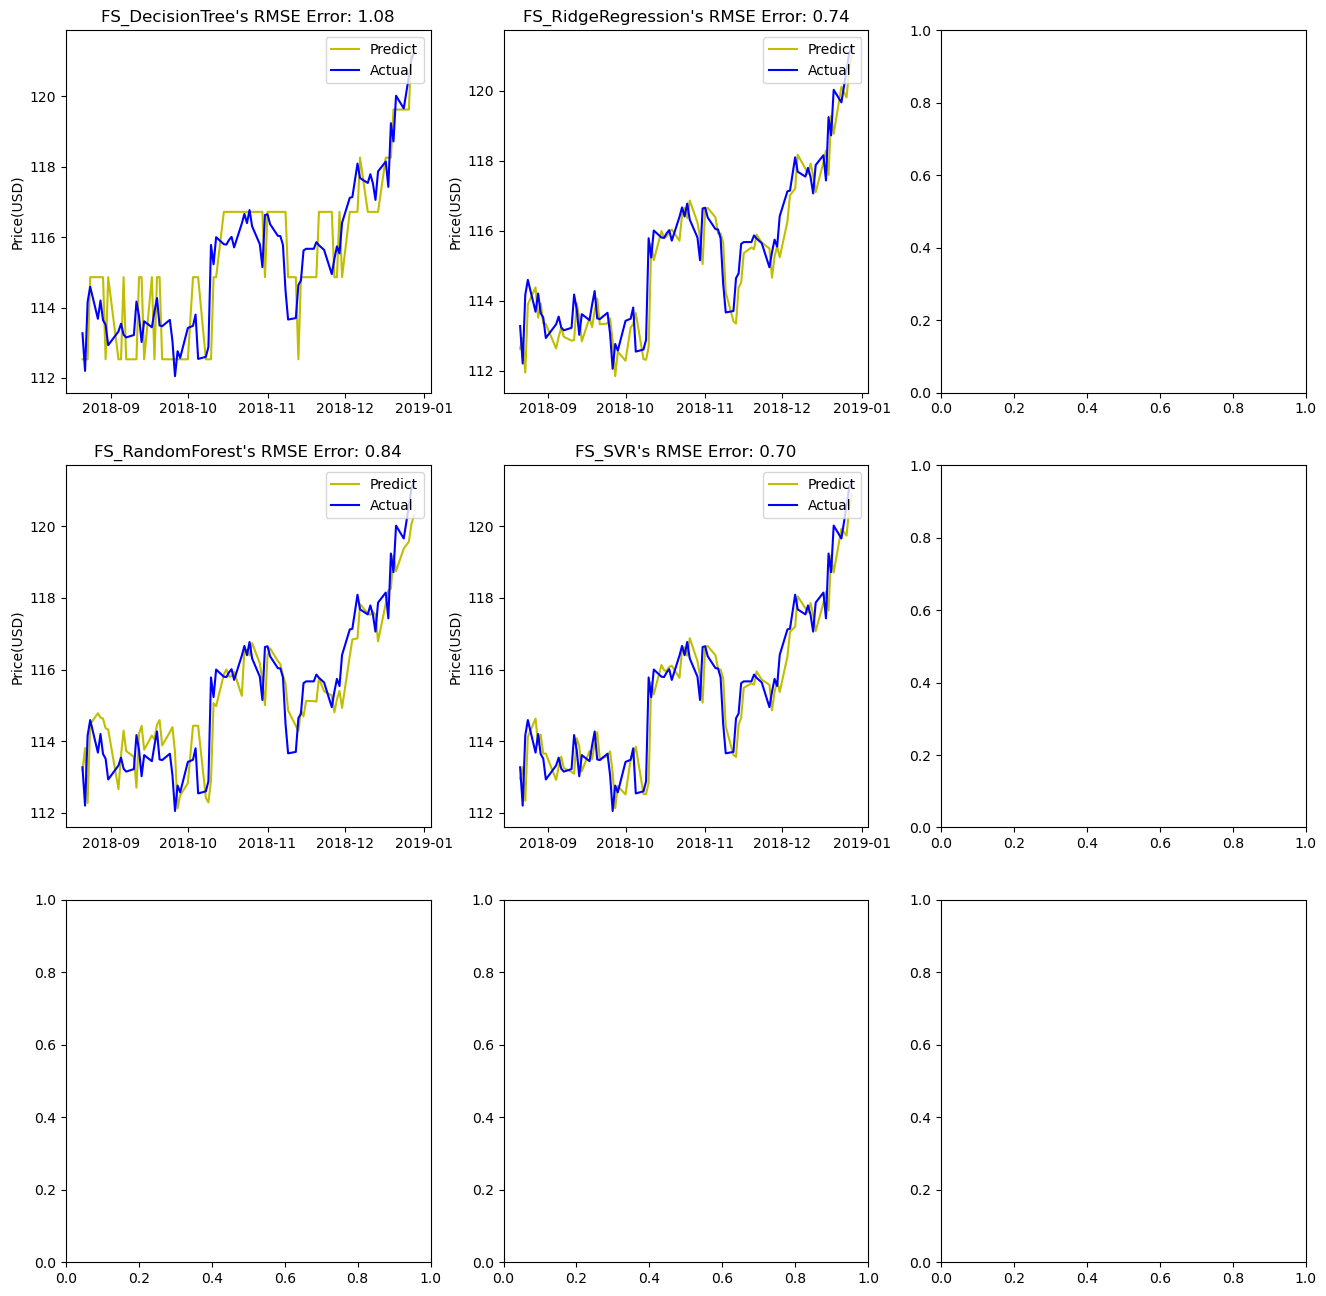

In [85]:
FS_RMSE_scores = {}

def fs_model_review(models):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 16))

    #plot block
    ax_x = 0
    ax_y = 0
    #plot solution model
    for name, model in models.items():
        predicted = model.predict(feature_selected_validation_X)
        RSME_score = np.sqrt(mean_squared_error(validation_y, predicted))

        R2_score = r2_score(validation_y, predicted)
    
        axes[ax_x][ax_y].plot(validation_y.index, predicted,'y', label='Predict')
        axes[ax_x][ax_y].plot(validation_y.index, validation_y,'b', label='Actual')
        axes[ax_x][ax_y].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        axes[ax_x][ax_y].xaxis.set_major_locator(mdates.MonthLocator())
        axes[ax_x][ax_y].set_ylabel('Price(USD)')
        axes[ax_x][ax_y].set_title(name + "'s RMSE Error: " +"{0:.2f}".format(RSME_score))
        axes[ax_x][ax_y].legend(loc='upper right')
        FS_RMSE_scores[name] = RSME_score
        if ax_x <2:
            if ax_y < 1:
                ax_y += 1
            else:
                ax_x += 1
                ax_y = 0
    plt.show()

fs_model_review(feature_selected_solution_models)

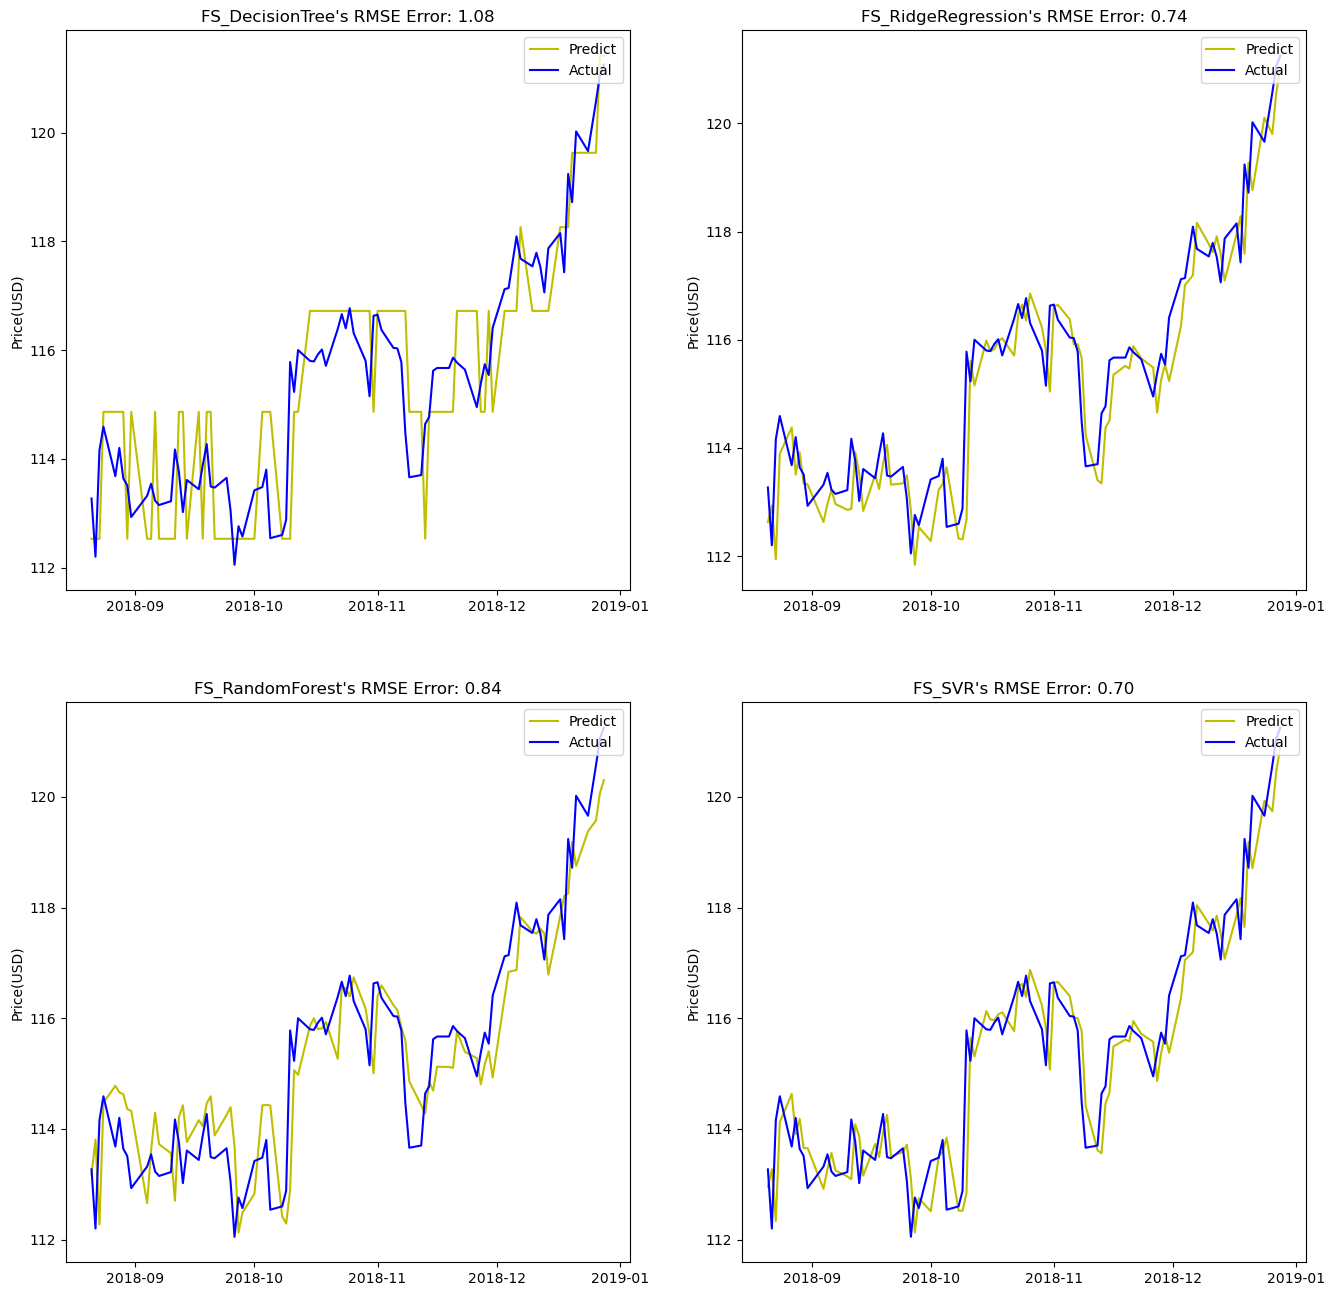

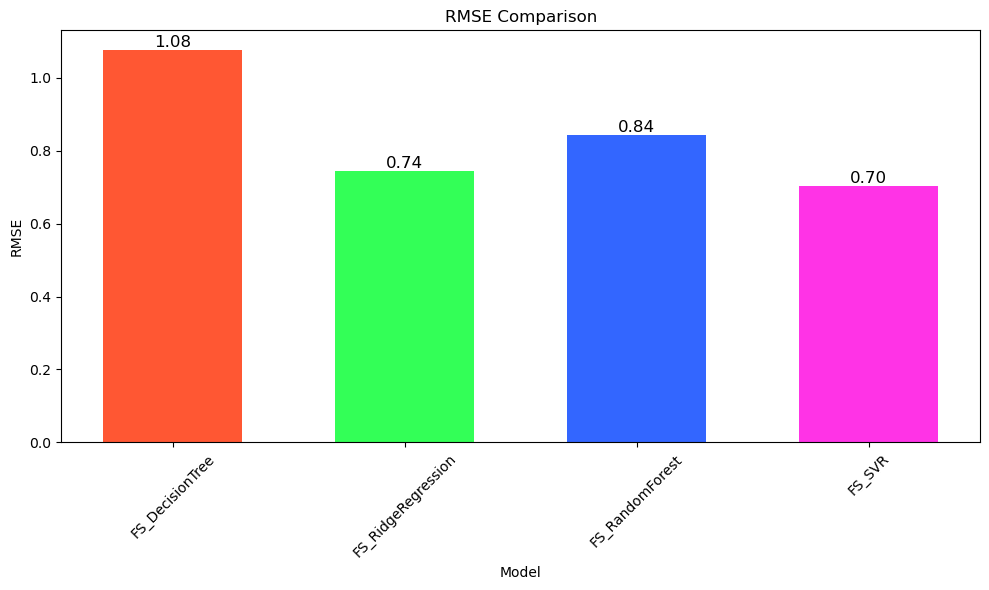

In [86]:
import matplotlib.pyplot as plt
import numpy as np

FS_RMSE_scores = {}

def fs_model_review(models):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))

    # Plot block
    ax_x = 0
    ax_y = 0

    # List of colors for the bars
    colors = ['#FF5733', '#33FF57', '#3366FF', '#FF33E6']

    # Lists to store model names and RMSE values
    model_names = []
    model_values = []

    # Plot solution models
    for name, model in models.items():
        predicted = model.predict(feature_selected_validation_X)
        RMSE_score = np.sqrt(mean_squared_error(validation_y, predicted))

        R2_score = r2_score(validation_y, predicted)

        # Add model name and RMSE value to the lists
        model_names.append(name)
        model_values.append(RMSE_score)

        axes[ax_x][ax_y].plot(validation_y.index, predicted, 'y', label='Predict')
        axes[ax_x][ax_y].plot(validation_y.index, validation_y, 'b', label='Actual')
        axes[ax_x][ax_y].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        axes[ax_x][ax_y].xaxis.set_major_locator(mdates.MonthLocator())
        axes[ax_x][ax_y].set_ylabel('Price(USD)')
        axes[ax_x][ax_y].set_title(name + "'s RMSE Error: " + "{0:.2f}".format(RMSE_score))
        axes[ax_x][ax_y].legend(loc='upper right')
        FS_RMSE_scores[name] = RMSE_score

        if ax_x < 2:
            if ax_y < 1:
                ax_y += 1
            else:
                ax_x += 1
                ax_y = 0

    # Create a histogram to compare RMSE values with different colors
    fig, ax = plt.subplots(figsize=(10, 6))
    bars = ax.bar(np.arange(len(model_names)), model_values, width=0.6, align="center", color=colors)
    ax.set_xticks(np.arange(len(model_names)))
    ax.set_xticklabels(model_names, rotation=45)
    ax.set_xlabel('Model')
    ax.set_ylabel('RMSE')
    ax.set_title('RMSE Comparison')

    # Annotate bars with RMSE values
    for i, bar in enumerate(bars):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{model_values[i]:.2f}',
                 ha='center', va='bottom', fontsize=12)

    plt.tight_layout()
    plt.show()

# Call the function to display both the line plots and the RMSE histogram
fs_model_review(feature_selected_solution_models)


# Comparison of RMSE of Feature selected models and Original Features model


model_values shape: (4,)
fs_model_values shape: (4,)


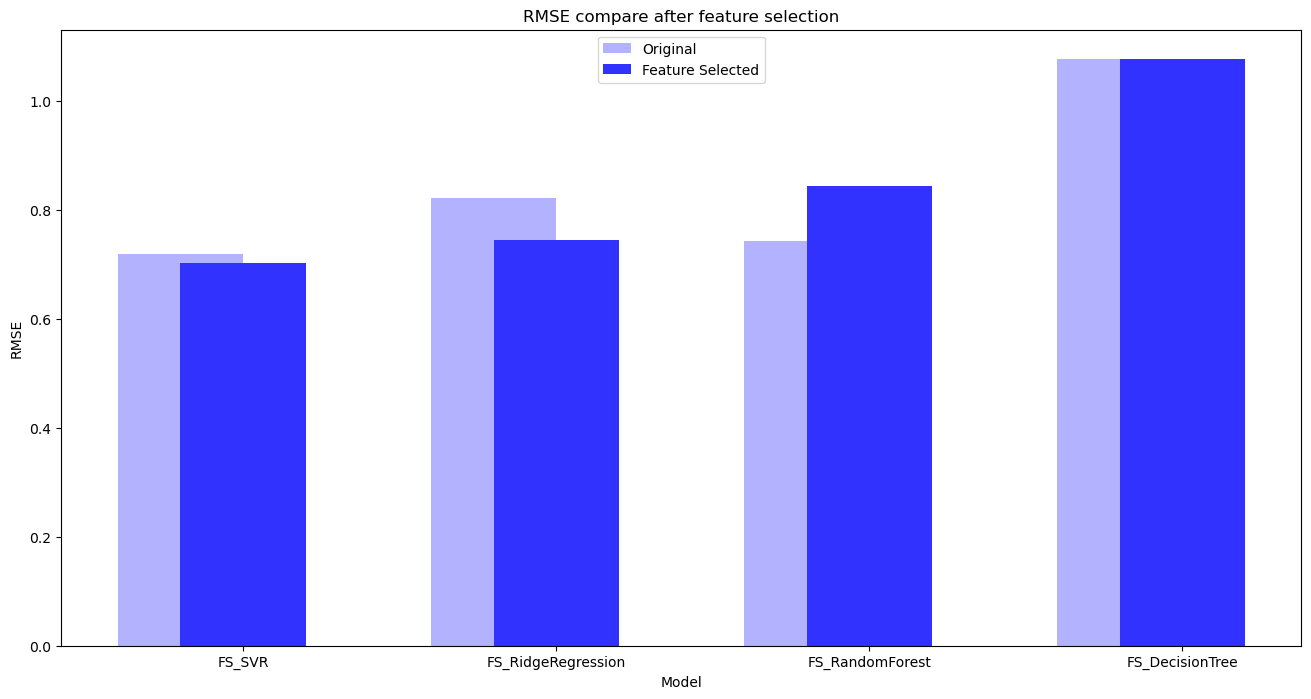

In [97]:
fs_model_names = []
fs_model_values = []
for name, value in FS_RMSE_scores.items():
    fs_model_names.append(name)
    fs_model_values.append(value)

fs_model_values = np.array(fs_model_values)
fs_model_names = np.array(fs_model_names)

fs_indices = np.argsort(fs_model_values)
fs_columns = fs_model_names[fs_indices[:8]]
fs_values = fs_model_values[fs_indices][:8]
origin_values = model_values[fs_indices][:8]
# Check the shapes of model_values and fs_model_values
print("model_values shape:", model_values.shape)
print("fs_model_values shape:", fs_model_values.shape)

# Make sure they have the same shape
if model_values.shape != fs_model_values.shape:
    raise ValueError("model_values and fs_model_values have different shapes")

# Rest of your code for plotting
fig = plt.figure(figsize=(16, 8))
plt.bar(np.arange(4) - 0.2, model_values[fs_indices][:8], width=0.4, align="center", color='#b2b2ff', label="Original")
plt.bar(np.arange(4), fs_values, width=0.4, align="center", color='#3232ff', label="Feature Selected")
plt.xticks(np.arange(4), fs_columns)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE compare after feature selection')
plt.legend(loc='upper center')
plt.show()



In [107]:
import joblib
joblib.dump(svr_grid_search_fs, 'svr.pkl')
joblib.dump(feature_selected, 'feature_selected.pkl')


['feature_selected.pkl']